# **Quantum Computing Portfolio Optimization: CAPM, Sharpe Ratio, Monte Carlo**
------------------------------------------------------------------
## **Introduction** ##

This notebook is composed of The Quantum Insider's Top Quantum Computing Companies in 2025 (for the US) and additional stocks where found through online research. These quantum computing companies are leading big tech and public companies. For this project, the Yahoo Finance library and the S&P 500 was used to analyze the data. There is historical stock price data for the following 19 quantum computing companies:

Top 19  Quantum Computing Stocks:

#1. Amazon Braket (Amazon)| Stock Ticker: AMZN

#2. D-Wave Quantum Inc| Stock Ticker: QBTS

#3. IBM (IBM Quantum)| Stock Ticker: IBM

#4. IONQ | Stock Ticker: IONQ

#5. Alphabet (Google Quantum AI) | Stock Ticker: GOOG

#6. Microsoft(Azure Quantum)| Stock Ticker: MSFT

#7. NVIDIA Corp | Stock Ticker: NVDA

#8. Quantum Computing Inc | Stock Ticker: QUBT

#9. Rigetti Computing | Stock Ticker: RGTI

#10.Atlantic Quantum  | Stock Ticker: QMCO 

#11. PsiQuantum | Stock Ticker: PSIQ.PVT

#12. Honeywell Quantum Solutions and Cambridge
Quantum have combined to form Quantinuum – the world’s largest integrated quantum computing company. Honeywell Quantum Solutions owns a majority stake in Quantinuum but is a separate publicly traded company with its own ticker symbol. | Stock Ticker: HON

#13.Quantum Base aka Quantum Base Holdings PLC | Stock Tiker: QUBE.L

#14. Xanadu introduced Aurora: A universal photonic computer | Stock Ticker: AUR

#15.Alphabet (Google Quantum AI) | Stock Ticker: GOOGL

#16. Intel | Stock Ticker: INTC

#17. Arqit Quantum | Stock Ticker: ARQQ

#18. Defiance Quantum ETF | Stock Ticker: QTUM

#19. Sealsq Corp | Stock Ticker: LAES

Additional Stocks that can be explored 

#A.1QBIT | Stock Ticker: QBIT

#B.Alpine Quantum Technologies | Stock Ticker: AQT


# **Project Purpose**

To examine and model uncertainty for stock returns in Quantum Computing using the Monte Carlo Simulation. Quantum computing is a budding industry; there is more volatility, unstable returns, and less historical data.  

This project will explore the historical data of existing stocks, estimate parameters (mean return vector, covariance matrix, volatility of each stock, simulate returns (using historical mean and covariance matrix to simulate), and simulate portfolio value using trial portfolio weight value, and search for optimal portfolio using various weight combinations.

Project Push/Addition:

To explore the t-distribution (fat tails), because there are extreme gains and losses which could indicate marke crashes or movements due to uncertainty in the market.

To use bootstrapping

# **Monte Carlo Simulation**

The Monte Carlo Simulation examines random variables and estimates the different outcomes based on them. Historical and statistical data are used to test the assumptions about market behavior.

The 4 Steps in a Monte Carlo Simulation
To perform a Monte Carlo simulation, there are four main steps. As an example, Microsoft Excel or a similar program can be used to create a Monte Carlo simulation that estimates the probable price movements of stocks or other assets.

There are two components to an asset's price movement: drift, which is its constant directional movement, and a random input, which represents market volatility.

By analyzing historical price data, you can determine the drift, standard deviation, variance, and average price movement of a security. These are the building blocks of a Monte Carlo simulation.

The four steps are as follows:

Step 1. To project one possible price trajectory, use the historical price data of the asset to generate a series of periodic daily returns using the natural logarithm (note that this equation differs from the usual percentage change formula):

![alt text]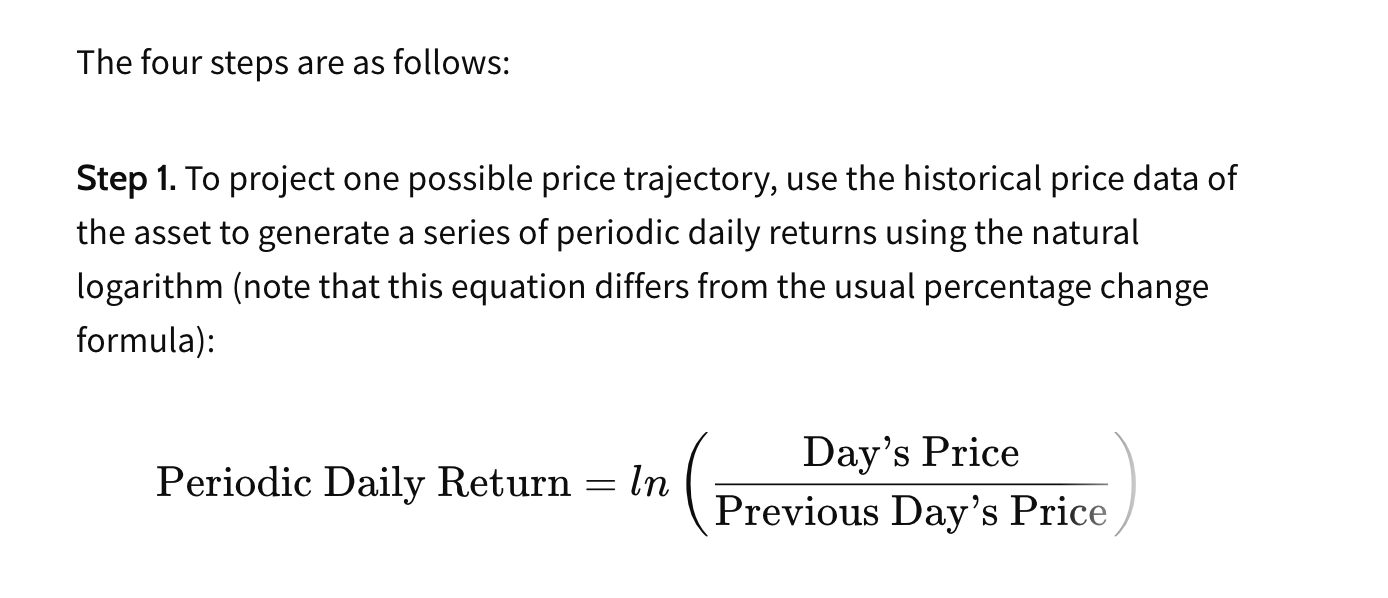
 
Step 2. Next, use the AVERAGE, STDEV.P, and VAR.P functions on the entire resulting series to obtain the average daily return, standard deviation, and variance inputs, respectively. The drift is equal to:

![alt text]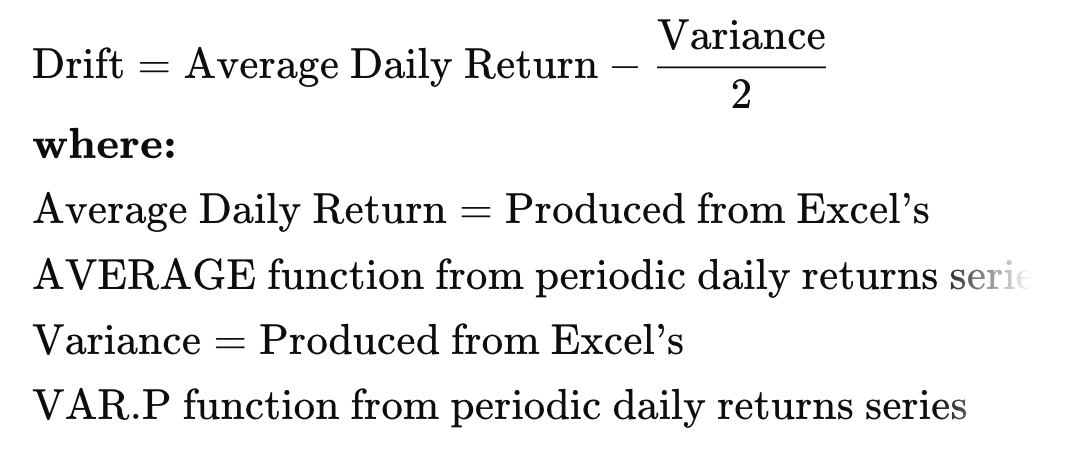
​
Alternatively, drift can be set to 0; this choice reflects a certain theoretical orientation, but the difference will not be huge, at least for shorter time frames.

Step 3. Next, obtain a random input:

![alt text]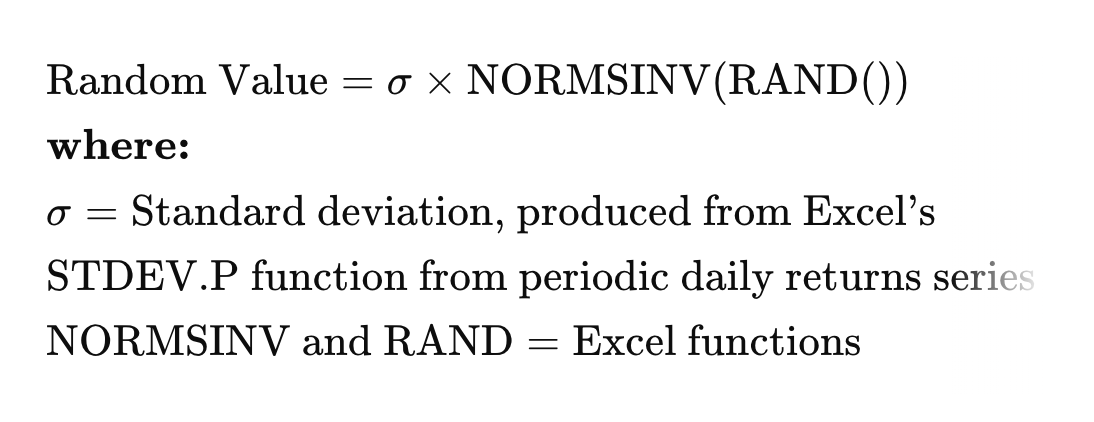
​ 
The equation for the following day's price is:

![alt text]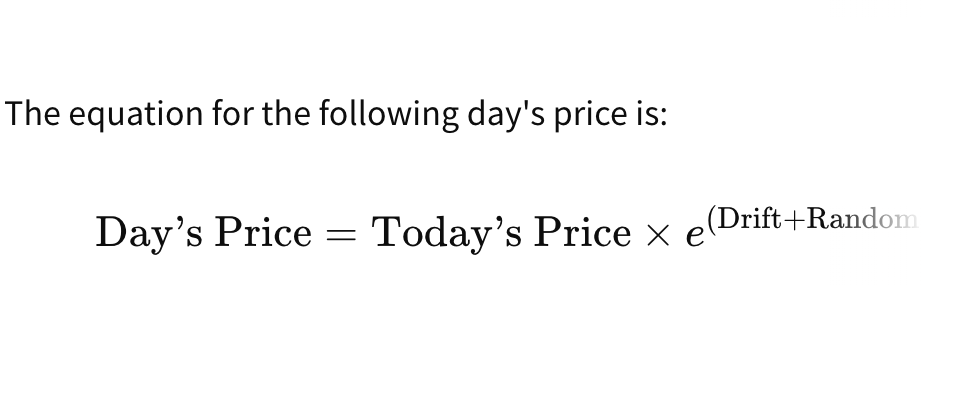​
  
Next Day’s Price=Today’s Price×e 
(Drift+Random Value)
 
Step 4. To take e to a given power x in Excel, use the EXP function: EXP(x). Repeat this calculation the desired number of times. (Each repetition represents one day.) The result is a simulation of the asset's future price movement.

By generating an arbitrary number of simulations, you can assess the probability that a security's price will follow a given trajectory.

Monte Carlo Simulation Results Explained
In many models, outcomes follow a normal distribution or bell-curve, with the most likely return at the center. This means the actual result is just as likely to fall above that point as below it.

The probability that the actual return will be within one standard deviation of the most probable ("expected") rate is 68%. The probability is 95% that it will be within two standard deviations and 99.7% that it will be within three standard deviations.

Still, there is no guarantee that the most expected outcome will occur, or that actual movements will not exceed the wildest projections.

Crucially, a Monte Carlo simulation ignores everything not built into the price movement, such as macro trends, a company's leadership, market hype, and cyclical factors.

In other words, it assumes a perfectly efficient market, where price movements follow statistically consistent patterns derived from historical data, even though real-world markets can behave unpredictably.

Advantages and Disadvantages of a Monte Carlo Simulation
The Monte Carlo simulation was created to overcome a perceived disadvantage of other methods of estimating a probable outcome.

The difference is that the Monte Carlo method tests a number of random variables and then averages them, rather than starting out with an average.

Like any financial simulation, the Monte Carlo method relies on historical price data as the basis for a projection of future price data. It then disrupts the pattern by introducing random variables, represented by numbers. Finally, it averages those numbers to arrive at an estimate of the risk that the pattern will be disrupted in real life.

Of course, no simulation can pinpoint an inevitable outcome. The Monte Carlo method aims at a sounder estimate of the probability that an outcome will differ from a projection.

How Is the Monte Carlo Simulation Used in Finance?
A Monte Carlo simulation is used to estimate the probability of a certain outcome. As such, it is widely used by investors and financial analysts to evaluate the probable success of investments they're considering. Some common uses include:

Pricing stock options: The potential price movements of the underlying asset are tracked, given every possible variable. The results are averaged and then discounted to the asset's current price. This is intended to indicate the probable payoff of the options.
Portfolio valuation: A number of alternative portfolios can be tested using the Monte Carlo simulation in order to arrive at a measure of their comparative risk.
Fixed-income investments: The short rate is the random variable here. The simulation is used to calculate the probable impact of movements in the short rate on fixed-income investments, such as bonds.

In [1]:
#pip install yfinance library, which allows you to access financial data from Yahoo Finance. This library is popular for downloading historical market data and performing financial analyses

!pip install yfinance

In [2]:
#Import libraries

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [3]:
#Assigning the variable stocks and creating a list of strings like 'AMZN' that correspond with stock tickers of companies.

stocks = ['AMZN', 'QBTS', 'IBM', 'IONQ', 'GOOG', 'GOOGL', 'MSFT', 'NVDA', 'QUBT', 'RGTI','QMCO','PSIQ.PVT','HON','QUBE.L','AUR','GOOGL', 'INTC','ARQQ','QTUM','LAES']

In [4]:
#Assigning the variable stocksdata using yf.download() to download stock information with start and end dates.
#auto_adjust=True (default): yfinance automatically adjusts the historical prices (open, high, low, close) to reflect splits and dividends. Prices are adjusted.
#auto_adjust=False: yfinance shows raw, unadjusted prices (open, high, low, close). Has an Adj Close column which contains the adjusted closing prices. 

stocksdata = yf.download(stocks, start = '2022-01-01', end = '2025-11-17',auto_adjust=False) ['Adj Close']

[*********************100%***********************]  19 of 19 completed


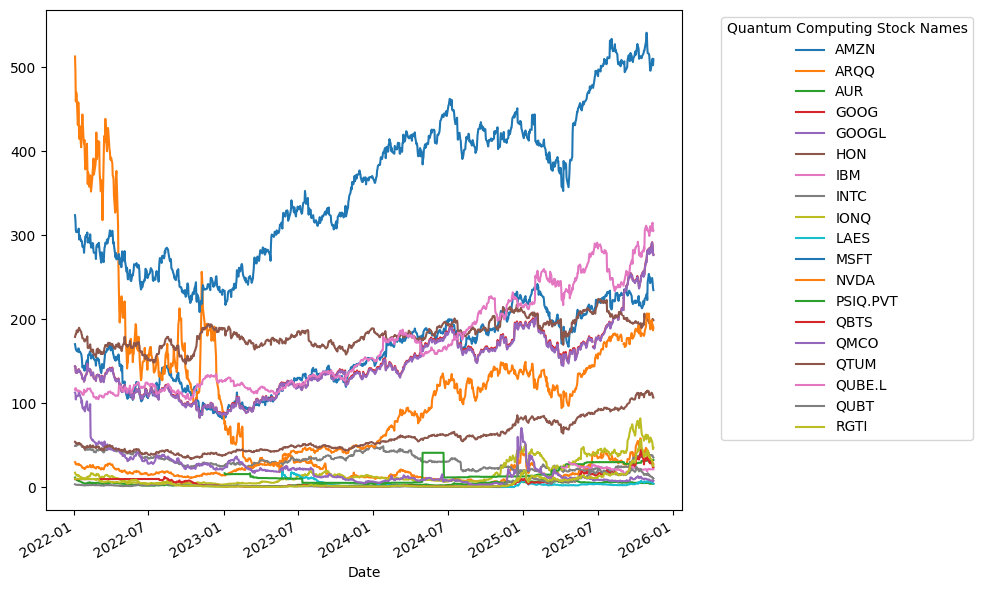

In [5]:
#Plots the historical stock information for the Quantum Computing Companies from 2022-01-01 to 2025-11-17'
stocksdata.plot(figsize=(10,6))
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title= "Quantum Computing Stock Names")
plt.tight_layout()
plt.show()

In [6]:
#Correlation to calculate the return on the shares. Two methods that can be used: 1) normal return or 2) logarithmic return.
#Calculates the logarithmic returns of a time series dataset used for financial analysis.
#Using the logarithmic return.
stocksdata = np. log(stocksdata/stocksdata.shift())
stocksdata.head()

Ticker,AMZN,ARQQ,AUR,GOOG,GOOGL,HON,IBM,INTC,IONQ,LAES,MSFT,NVDA,PSIQ.PVT,QBTS,QMCO,QTUM,QUBE.L,QUBT,RGTI
Date,,,,,,,,,,,,,,,,,,,
2022-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,-0.017060,-0.036241,-0.075828,-0.004546,-0.004091,0.010582,0.014450,-0.001316,-0.060768,NaN,-0.017296,-0.027976,NaN,-0.002039,-0.007117,-0.003910,NaN,-0.067252,-0.000974
2022-01-05,-0.019074,-0.073952,-0.088107,-0.047962,-0.046962,0.009808,0.001448,0.013644,-0.066649,NaN,-0.039144,-0.059286,NaN,0.003057,-0.068355,-0.027622,NaN,-0.068993,-0.005865
2022-01-06,-0.006734,0.023138,-0.046616,-0.000745,-0.000200,-0.001137,-0.021057,0.002596,-0.035742,NaN,-0.007933,0.020581,NaN,-0.001018,0.039368,0.003654,NaN,-0.031548,0.001959
2022-01-07,-0.004297,-0.008011,-0.086337,-0.003981,-0.005317,0.023115,-0.003775,-0.010610,-0.032184,NaN,0.000510,-0.033598,NaN,-0.001019,-0.001840,-0.015068,NaN,-0.039221,0.002931


In [7]:
# Correlation

corr_stockes = stocksdata.corr()

In [8]:
#Plotting the correlation

corr_stockes.style.background_gradient(cmap='Purples')

Ticker,AMZN,ARQQ,AUR,GOOG,GOOGL,HON,IBM,INTC,IONQ,LAES,MSFT,NVDA,PSIQ.PVT,QBTS,QMCO,QTUM,QUBE.L,QUBT,RGTI
Ticker,,,,,,,,,,,,,,,,,,,
AMZN,1.000000,0.152730,0.400503,0.631705,0.629549,0.379046,0.228556,0.387437,0.421200,0.168852,0.672865,0.565822,-0.077521,0.135159,0.130322,0.633600,0.073543,0.196568,0.238079
ARQQ,0.152730,1.000000,0.160882,0.141184,0.140355,0.130610,0.088023,0.156975,0.373924,0.258009,0.165641,0.164152,-0.028779,0.357789,0.347646,0.353926,0.109135,0.402755,0.441495
AUR,0.400503,0.160882,1.000000,0.334055,0.331812,0.279613,0.140071,0.287519,0.399553,0.136831,0.342624,0.328973,-0.085249,0.216580,0.140042,0.490669,0.101388,0.232183,0.310508
GOOG,0.631705,0.141184,0.334055,1.000000,0.997728,0.360137,0.249891,0.329380,0.351220,0.177890,0.651251,0.541541,-0.049687,0.143803,0.132392,0.606128,-0.197117,0.170228,0.241353
GOOGL,0.629549,0.140355,0.331812,0.997728,1.000000,0.358970,0.248627,0.327568,0.350673,0.175383,0.650022,0.540305,-0.055207,0.140356,0.130398,0.604716,-0.194929,0.169007,0.239745
HON,0.379046,0.130610,0.279613,0.360137,0.358970,1.000000,0.391773,0.356298,0.256108,0.078781,0.411165,0.314601,-0.022613,0.092095,0.160619,0.522689,0.059473,0.134217,0.163025
IBM,0.228556,0.088023,0.140071,0.249891,0.248627,0.391773,1.000000,0.293349,0.184112,0.043810,0.239954,0.239211,0.006016,0.085394,0.060697,0.382121,-0.024637,0.097462,0.131220
INTC,0.387437,0.156975,0.287519,0.329380,0.327568,0.356298,0.293349,1.000000,0.278691,0.141365,0.386213,0.396295,-0.048731,0.144047,0.129625,0.559826,-0.034367,0.174674,0.181771
IONQ,0.421200,0.373924,0.399553,0.351220,0.350673,0.256108,0.184112,0.278691,1.000000,0.223745,0.358213,0.379530,-0.035491,0.441504,0.262593,0.609403,0.097769,0.464164,0.563033


In [9]:
#The top 10 stock companies that have the least correlation.

upper_triangle = corr_stockes.where(np.triu(np.ones(corr_stockes.shape), k=1).astype(bool))

correlation_sums = upper_triangle.sum(axis=1)

least_correlated_stocks = correlation_sums.nsmallest(10).index

selected_stockes = stocksdata[least_correlated_stocks]

print("Selected Stocks:")
print(least_correlated_stocks)

Selected Stocks:
Index(['PSIQ.PVT', 'QUBE.L', 'RGTI', 'QUBT', 'QTUM', 'QMCO', 'NVDA', 'LAES',
       'IBM', 'MSFT'],
      dtype='object', name='Ticker')


# **CAPM**

# **Capital Asset Pricing Model**

The Capital Asset Pricing Model examines the linear relationship between systematic risk and expected return. 

![alt text]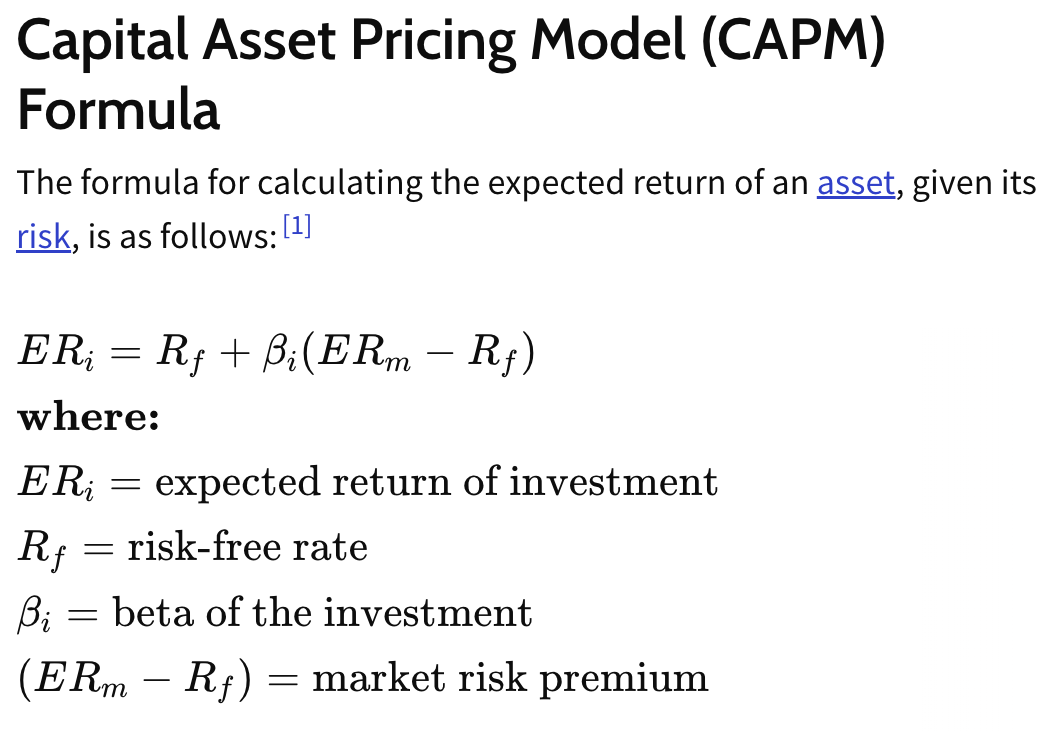

In [10]:
#CAPM
#Selecting the least correlated stocks, setting the time series, and renaming the columns.

sel_stockes = list(least_correlated_stocks)
selected_list = sel_stockes + ["^GSPC"]
datastocks = yf.download(selected_list, start = '2022-01-01', end = '2025-11-17',auto_adjust=False)['Adj Close']
datastocks.rename(columns={'^GSPC': 'SP500'}, inplace=True)

datastocks

[*********************100%***********************]  11 of 11 completed


Ticker,IBM,LAES,MSFT,NVDA,PSIQ.PVT,QMCO,QTUM,QUBE.L,QUBT,RGTI,SP500
Date,,,,,,,,,,,
2022-01-03,116.169739,NaN,323.898407,30.064440,NaN,112.800003,54.293472,NaN,3.69,10.270000,4796.560059
2022-01-04,117.860565,NaN,318.344391,29.234999,NaN,112.000000,54.081615,NaN,3.45,10.260000,4793.540039
2022-01-05,118.031326,NaN,306.123932,27.552162,NaN,104.599998,52.608238,NaN,3.22,10.200000,4700.580078
2022-01-06,115.571976,NaN,303.704926,28.125088,NaN,108.800003,52.800831,NaN,3.12,10.220000,4696.049805
2022-01-07,115.136475,NaN,303.859772,27.195835,NaN,108.599998,52.011181,NaN,3.00,10.250000,4677.029785
...,...,...,...,...,...,...,...,...,...,...,...
2025-11-10,309.130005,5.96,505.054718,199.050003,32.610001,8.190000,112.620003,21.5,12.70,33.080002,6832.430176
2025-11-11,313.720001,5.53,507.729706,193.160004,32.610001,7.880000,111.150002,21.5,11.94,31.400000,6846.609863
2025-11-12,314.980011,5.34,510.185150,193.800003,32.610001,7.700000,110.730003,21.5,11.14,28.299999,6850.919922


In [11]:
datastocks = np.log(datastocks/datastocks.shift())

In [12]:
cov = datastocks.cov()
cov

Ticker,IBM,LAES,MSFT,NVDA,PSIQ.PVT,QMCO,QTUM,QUBE.L,QUBT,RGTI,SP500
Ticker,,,,,,,,,,,
IBM,0.000226,0.000074,0.000061,0.000123,0.000008,0.000085,0.000098,-0.000014,0.000121,0.000170,0.000079
LAES,0.000074,0.011678,0.000182,0.000452,0.000073,0.001836,0.000511,-0.000051,0.002553,0.003499,0.000196
MSFT,0.000061,0.000182,0.000289,0.000372,-0.000119,0.000214,0.000188,-0.000073,0.000271,0.000323,0.000149
NVDA,0.000123,0.000452,0.000372,0.001161,-0.000020,0.000390,0.000424,-0.000077,0.000592,0.000708,0.000280
PSIQ.PVT,0.000008,0.000073,-0.000119,-0.000020,0.008040,-0.000405,-0.000055,0.000017,-0.000061,-0.000405,-0.000048
QMCO,0.000085,0.001836,0.000214,0.000390,-0.000405,0.008732,0.000525,-0.000036,0.003050,0.003228,0.000201
QTUM,0.000098,0.000511,0.000188,0.000424,-0.000055,0.000525,0.000294,0.000015,0.000626,0.000760,0.000164
QUBE.L,-0.000014,-0.000051,-0.000073,-0.000077,0.000017,-0.000036,0.000015,0.001096,-0.000097,0.000044,-0.000019
QUBT,0.000121,0.002553,0.000271,0.000592,-0.000061,0.003050,0.000626,-0.000097,0.006790,0.003717,0.000244


In [13]:
variance = datastocks['SP500'].var()
variance

0.00012834217904154148

In [14]:
beta = cov.loc['SP500'].var()
beta

1.2254712436684713e-08

In [15]:
#

beta = cov.loc['SP500']/variance
beta

Ticker
IBM         0.617307
LAES        1.525044
MSFT        1.161672
NVDA        2.183185
PSIQ.PVT   -0.376749
QMCO        1.565479
QTUM        1.280606
QUBE.L     -0.149173
QUBT        1.899214
RGTI        2.228374
SP500       1.000000
Name: SP500, dtype: float64

In [16]:
#Checking for companies that have expected returns greater than 1. These stocks are selected for the portfolio. SP500 IS 0.100000.
#Any stocks that are greater than 0.100000. Stocks under 0.100000 are not selected.

riskfreereturn = 0.042
marketreturn = 0.1
expectedreturn = riskfreereturn + beta*(marketreturn - riskfreereturn)
expectedreturn

Ticker
IBM         0.077804
LAES        0.130453
MSFT        0.109377
NVDA        0.168625
PSIQ.PVT    0.020149
QMCO        0.132798
QTUM        0.116275
QUBE.L      0.033348
QUBT        0.152154
RGTI        0.171246
SP500       0.100000
Name: SP500, dtype: float64

In [17]:
#Monte Carlo
#Optimal Proportions are for stocks in Portfolio

final_Stocks = ['LAES', 'MSFT', 'NVDA', 'QMCO', 'QUBT','RGTI']
data = stocksdata[final_Stocks]
data

Ticker,LAES,MSFT,NVDA,QMCO,QUBT,RGTI
Date,,,,,,
2022-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,NaN,-0.017296,-0.027976,-0.007117,-0.067252,-0.000974
2022-01-05,NaN,-0.039144,-0.059286,-0.068355,-0.068993,-0.005865
2022-01-06,NaN,-0.007933,0.020581,0.039368,-0.031548,0.001959
2022-01-07,NaN,0.000510,-0.033598,-0.001840,-0.039221,0.002931
...,...,...,...,...,...,...
2025-11-10,-0.033006,0.018309,0.056317,0.001222,-0.012520,-0.020644
2025-11-11,-0.074883,0.005282,-0.030037,-0.038586,-0.061708,-0.052121
2025-11-12,-0.034962,0.004824,0.003308,-0.023108,-0.069352,-0.103946


In [18]:
import numpy as np

# --- FIX: select only numeric columns or specific assets ---
# Example: select the first 5 columns
data_clean = data.select_dtypes(include=[np.number]).iloc[:, :5]

# Monte Carlo Simulation
n = 25000

weights = np.zeros((n, 5))
exp_returns = np.zeros(n)
exp_volatilities = np.zeros(n)
sharpe_ratios = np.zeros(n)

for i in range(n):
    weight = np.random.random(5)
    weight /= np.sum(weight)
    weights[i] = weight

    mean_returns = data_clean.mean()
    cov_matrix = data_clean.cov()

    exp_returns[i] = np.sum(mean_returns * weight) * 252
    exp_volatilities[i] = np.sqrt(np.dot(weight.T, np.dot(cov_matrix * 252, weight)))
    sharpe_ratios[i] = exp_returns[i] / exp_volatilities[i]


Text(0, 0.5, 'Expected Return')

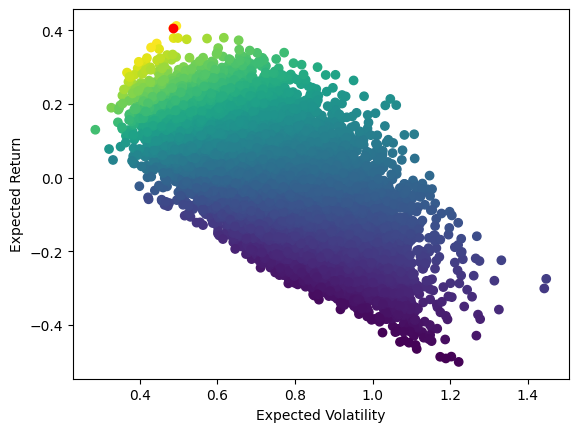

In [19]:
ig, ax = plt.subplots()
ax.scatter(exp_volatilities, exp_returns, c=sharpe_ratios)
ax.scatter(exp_volatilities[sharpe_ratios.argmax()], exp_returns[sharpe_ratios.argmax()], c='r')
ax.set_xlabel("Expected Volatility")
ax.set_ylabel("Expected Return")

# **Monte Carlo Simulation Method A**

In [20]:
#Monte Carlo Simulation

n = 25000
num_assets = data.shape[1]   # automatically detects number of assets
weights = np.zeros((n, num_assets))
expectedreturns = np.zeros(n)
expectedvolatilities = np.zeros(n)
SharpeRatios = np.zeros(n)

for i in range(n):
    weight = np.random.random(num_assets)
    weight /= np.sum(weight)
    weights[i] = weight

    expectedreturns[i] = np.sum(data.mean() * weight) * 252
    expectedvolatilities[i] = np.sqrt(np.dot(weight.T, np.dot(data.cov() * 252, weight)))
    SharpeRatios[i] = expectedreturns[i] / expectedvolatilities[i]

Text(0, 0.5, 'Expected Return')

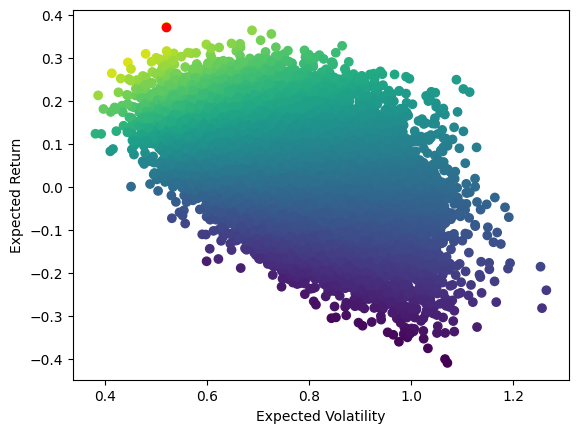

In [21]:
# 

ig, ax = plt.subplots()
ax.scatter(expectedvolatilities,expectedreturns, c = SharpeRatios)
ax.scatter(expectedvolatilities[SharpeRatios.argmax()], expectedreturns[SharpeRatios.argmax()], c='r')
ax.set_xlabel("Expected Volatility")
ax.set_ylabel("Expected Return")

In [24]:
#The Efficient Frontier shows the optimal portfolios with the highest expected return regardless of risk.
#The best weights for escach stock in the portfolio.

SharpeIndex = SharpeRatios.argmax()
weights = weights[MaxSharpeIndex]

print("Optimal Weights for Each Quantum Computing Stock:")
for i, stock in enumerate(data):
    print(f"{stock}: {weights[i]: .4f}")

Optimal Weights for Each Quantum Computing Stock:
LAES:  0.0337
MSFT:  0.0866
NVDA:  0.6586
QMCO:  0.0140
QUBT:  0.1472
RGTI:  0.0599


# **Monte Carlo Simulation Method B**

In [ ]:
!pip install prophet

In [ ]:
!pip install pandas-datareader

In [ ]:
import random
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.ticker as ticker
import plotly.figure_factory as ff

from prophet import Prophet
from pandas_datareader import data
from scipy import stats
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.preprocessing import MinMaxScaler

from matplotlib.ticker import FixedFormatter , FixedLocator

In [25]:
!pip install yfinance

In [101]:
#Import libraries

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data
from datetime import datetime
from scipy import stats

In [65]:
#Assigning the variable stocks and creating a list of strings like 'AMZN' that correspond with stock tickers of companies.

stocks = ['AMZN', 'QBTS', 'IBM', 'IONQ', 'GOOG', 'GOOGL', 'MSFT', 'NVDA', 'QUBT', 'RGTI','QMCO','PSIQ.PVT','HON','QUBE.L','AUR','GOOGL', 'INTC','ARQQ','QTUM','LAES']

In [66]:
#Assigning the variable stocksdata using yf.download() to download stock information with start and end dates.
#auto_adjust=True (default): yfinance automatically adjusts the historical prices (open, high, low, close) to reflect splits and dividends. Prices are adjusted.
#auto_adjust=False: yfinance shows raw, unadjusted prices (open, high, low, close). Has an Adj Close column which contains the adjusted closing prices. 

stocksdata = yf.download(stocks, start = '2022-01-01', end = '2025-11-17',auto_adjust=False) ['Adj Close']
stocksdata

[*********************100%***********************]  19 of 19 completed


Ticker,AMZN,ARQQ,AUR,GOOG,GOOGL,HON,IBM,INTC,IONQ,LAES,MSFT,NVDA,PSIQ.PVT,QBTS,QMCO,QTUM,QUBE.L,QUBT,RGTI
Date,,,,,,,,,,,,,,,,,,,
2022-01-03,170.404495,512.750000,11.64,144.088455,143.998322,179.020096,116.169739,49.350487,17.469999,NaN,323.898407,30.064440,NaN,9.820000,112.800003,54.293472,NaN,3.69,10.270000
2022-01-04,167.522003,494.500000,10.79,143.434952,143.410416,180.924591,117.860565,49.285561,16.440001,NaN,318.344391,29.234999,NaN,9.800000,112.000000,54.081615,NaN,3.45,10.260000
2022-01-05,164.356995,459.250000,9.88,136.717911,136.831253,182.707840,118.031326,49.962608,15.380000,NaN,306.123932,27.552162,NaN,9.830000,104.599998,52.608238,NaN,3.22,10.200000
2022-01-06,163.253998,470.000000,9.43,136.616104,136.803940,182.500137,115.571976,50.092461,14.840000,NaN,303.704926,28.125088,NaN,9.820000,108.800003,52.800831,NaN,3.12,10.220000
2022-01-07,162.554001,466.250000,8.65,136.073318,136.078445,186.767822,115.136475,49.563801,14.370000,NaN,303.859772,27.195835,NaN,9.810000,108.599998,52.011181,NaN,3.00,10.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-10,248.399994,32.189999,4.36,290.589996,290.100006,194.902634,309.130005,38.450001,55.369999,5.96,505.054718,199.050003,32.610001,29.370001,8.190000,112.620003,21.5,12.70,33.080002
2025-11-11,249.100006,31.410000,4.26,291.739990,291.309998,199.216797,313.720001,37.880001,54.419998,5.53,507.729706,193.160004,32.610001,28.990000,7.880000,111.150002,21.5,11.94,31.400000
2025-11-12,244.199997,30.320000,4.23,287.429993,286.709991,200.389755,314.980011,37.889999,50.709999,5.34,510.185150,193.800003,32.610001,26.400000,7.700000,110.730003,21.5,11.14,28.299999


In [67]:
cm = sns.light_palette("green", as_cmap=True)
stocksdata.head(30).style.background_gradient(cmap=cm)

/opt/anaconda3/lib/python3.12/site-packages/pandas/io/formats/style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/opt/anaconda3/lib/python3.12/site-packages/pandas/io/formats/style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


Ticker,AMZN,ARQQ,AUR,GOOG,GOOGL,HON,IBM,INTC,IONQ,LAES,MSFT,NVDA,PSIQ.PVT,QBTS,QMCO,QTUM,QUBE.L,QUBT,RGTI
Date,,,,,,,,,,,,,,,,,,,
2022-01-03 00:00:00,170.404495,512.750000,11.640000,144.088455,143.998322,179.020096,116.169739,49.350487,17.469999,nan,323.898407,30.064440,nan,9.820000,112.800003,54.293472,nan,3.690000,10.270000
2022-01-04 00:00:00,167.522003,494.500000,10.790000,143.434952,143.410416,180.924591,117.860565,49.285561,16.440001,nan,318.344391,29.234999,nan,9.800000,112.000000,54.081615,nan,3.450000,10.260000
2022-01-05 00:00:00,164.356995,459.250000,9.880000,136.717911,136.831253,182.707840,118.031326,49.962608,15.380000,nan,306.123932,27.552162,nan,9.830000,104.599998,52.608238,nan,3.220000,10.200000
2022-01-06 00:00:00,163.253998,470.000000,9.430000,136.616104,136.803940,182.500137,115.571976,50.092461,14.840000,nan,303.704926,28.125088,nan,9.820000,108.800003,52.800831,nan,3.120000,10.220000
2022-01-07 00:00:00,162.554001,466.250000,8.650000,136.073318,136.078445,186.767822,115.136475,49.563801,14.370000,nan,303.859772,27.195835,nan,9.810000,108.599998,52.011181,nan,3.000000,10.250000
2022-01-10 00:00:00,161.485992,431.250000,8.070000,137.632156,137.719650,184.785477,115.307259,51.205421,13.710000,nan,304.082275,27.348549,nan,9.810000,108.599998,51.760796,nan,2.920000,10.160000
2022-01-11 00:00:00,165.362000,458.250000,8.660000,139.065826,138.778809,187.252594,113.462746,51.854641,14.690000,nan,304.769318,27.764765,nan,9.820000,110.000000,52.646748,nan,3.220000,10.110000
2022-01-12 00:00:00,165.207001,445.750000,8.300000,140.685257,140.461700,188.931992,114.077583,51.696983,14.090000,nan,307.952667,27.946424,nan,9.810000,111.199997,52.820099,nan,3.030000,10.100000
2022-01-13 00:00:00,161.214005,415.000000,7.580000,138.185364,137.637711,189.953506,115.076691,50.954998,12.980000,nan,294.919250,26.525097,nan,9.810000,112.400002,51.857094,nan,2.950000,9.990000


In [68]:
# stocksdata is already defined as the Adj Close price DataFrame

# Reset index to turn Date into a column
df = stocksdata.reset_index()

# Melt the DataFrame into long format
df_long = df.melt(id_vars="Date",
                  var_name="ticker",
                  value_name="adj_close")

# Show the result
df_long

,Date,ticker,adj_close
0,2022-01-03,AMZN,170.404495
1,2022-01-04,AMZN,167.522003
2,2022-01-05,AMZN,164.356995
3,2022-01-06,AMZN,163.253998
4,2022-01-07,AMZN,162.554001
...,...,...,...
18520,2025-11-10,RGTI,33.080002
18521,2025-11-11,RGTI,31.400000
18522,2025-11-12,RGTI,28.299999
18523,2025-11-13,RGTI,25.200001


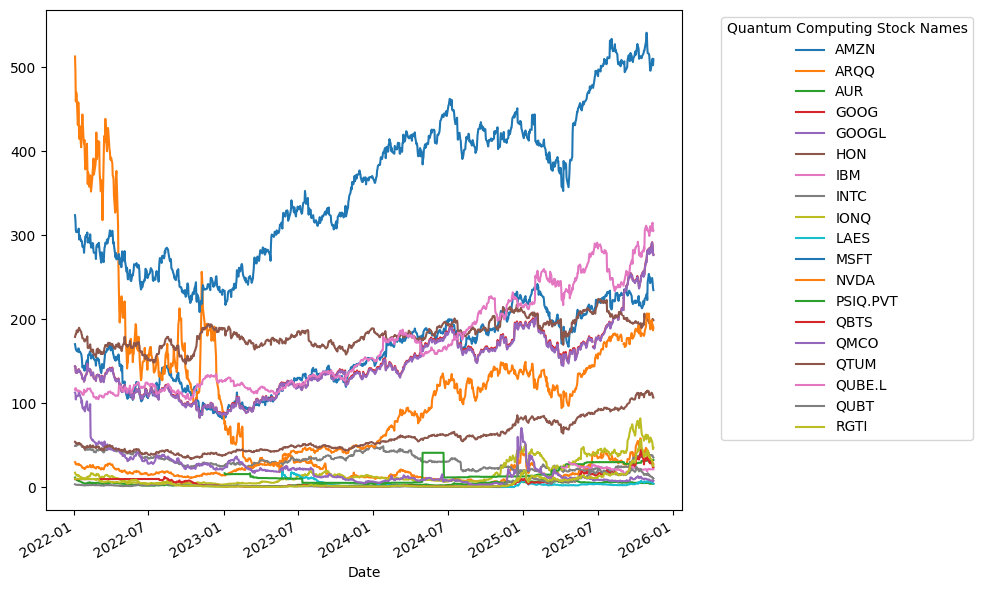

In [69]:
#Plots the historical stock information for the Quantum Computing Companies from 2022-01-01 to 2025-11-17'
stocksdata.plot(figsize=(10,6))
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title= "Quantum Computing Stock Names")
plt.tight_layout()
plt.show()

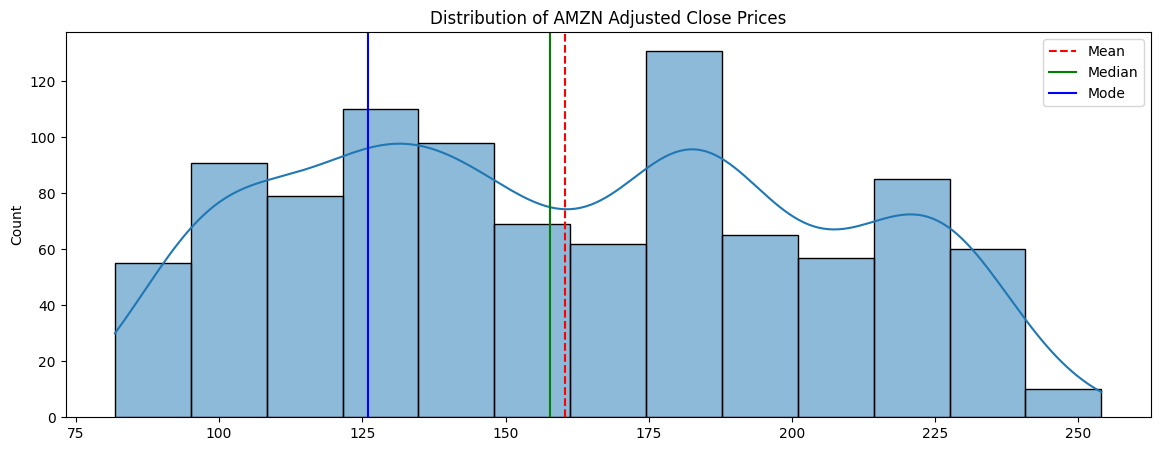

In [70]:
#Adjusted Close Prices for Amazon
import matplotlib.pyplot as plt
import seaborn as sns

# Choose a ticker
ticker = "AMZN"

# Extract the values
v_dist_1 = stocksdata[ticker].dropna().values

# Create plot
f, ax1 = plt.subplots(1, 1, figsize=(14, 5))
sns.histplot(v_dist_1, ax=ax1, kde=True)

# Summary statistics
mean = stocksdata[ticker].mean()
median = stocksdata[ticker].median()
mode = stocksdata[ticker].mode().values[0]

# Add lines
ax1.axvline(mean, color='r', linestyle='--', label="Mean")
ax1.axvline(median, color='g', linestyle='-', label="Median")
ax1.axvline(mode, color='b', linestyle='-', label="Mode")

ax1.set_title(f"Distribution of {ticker} Adjusted Close Prices")
ax1.legend()
plt.show()


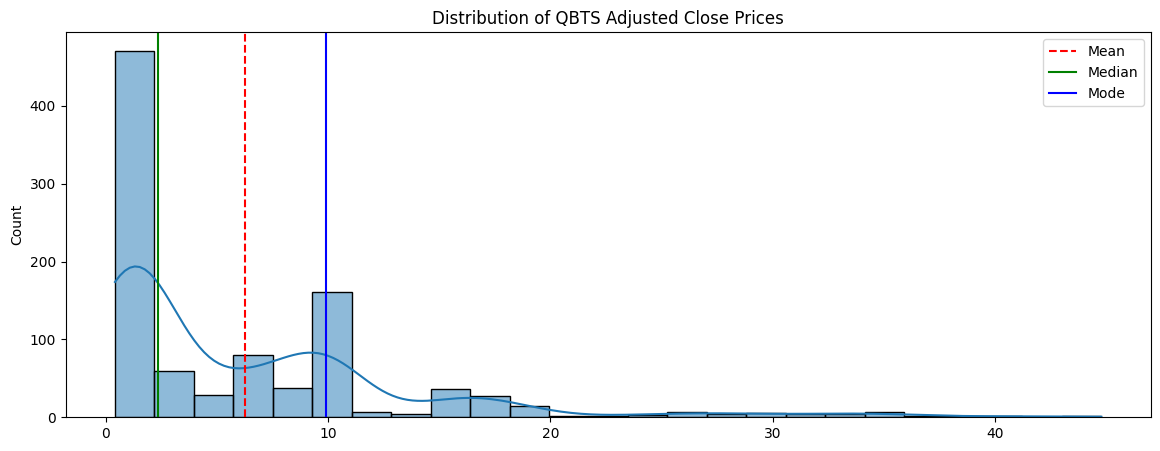

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose a ticker
ticker = "QBTS"

# Extract the values
v_dist_1 = stocksdata[ticker].dropna().values

# Create plot
f, ax1 = plt.subplots(1, 1, figsize=(14, 5))
sns.histplot(v_dist_1, ax=ax1, kde=True)

# Summary statistics
mean = stocksdata[ticker].mean()
median = stocksdata[ticker].median()
mode = stocksdata[ticker].mode().values[0]

# Add lines
ax1.axvline(mean, color='r', linestyle='--', label="Mean")
ax1.axvline(median, color='g', linestyle='-', label="Median")
ax1.axvline(mode, color='b', linestyle='-', label="Mode")

ax1.set_title(f"Distribution of {ticker} Adjusted Close Prices")
ax1.legend()
plt.show()


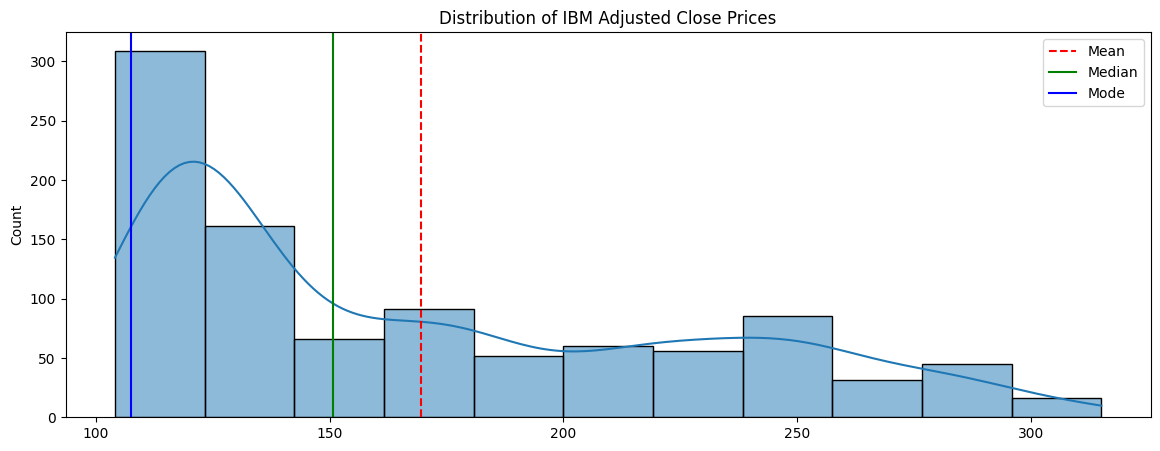

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose a ticker
ticker = "IBM"

# Extract the values
v_dist_1 = stocksdata[ticker].dropna().values

# Create plot
f, ax1 = plt.subplots(1, 1, figsize=(14, 5))
sns.histplot(v_dist_1, ax=ax1, kde=True)

# Summary statistics
mean = stocksdata[ticker].mean()
median = stocksdata[ticker].median()
mode = stocksdata[ticker].mode().values[0]

# Add lines
ax1.axvline(mean, color='r', linestyle='--', label="Mean")
ax1.axvline(median, color='g', linestyle='-', label="Median")
ax1.axvline(mode, color='b', linestyle='-', label="Mode")

ax1.set_title(f"Distribution of {ticker} Adjusted Close Prices")
ax1.legend()
plt.show()

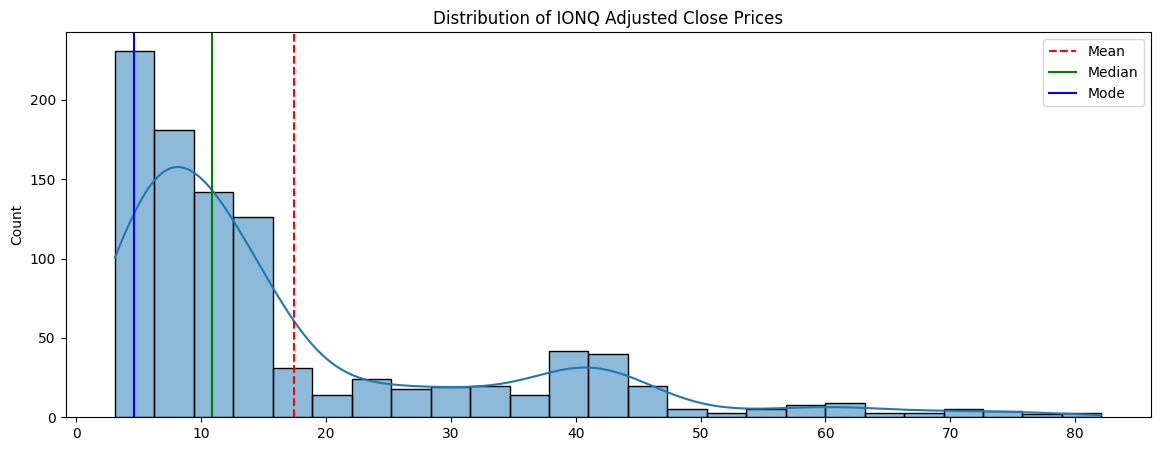

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose a ticker
ticker = "IONQ"

# Extract the values
v_dist_1 = stocksdata[ticker].dropna().values

# Create plot
f, ax1 = plt.subplots(1, 1, figsize=(14, 5))
sns.histplot(v_dist_1, ax=ax1, kde=True)

# Summary statistics
mean = stocksdata[ticker].mean()
median = stocksdata[ticker].median()
mode = stocksdata[ticker].mode().values[0]

# Add lines
ax1.axvline(mean, color='r', linestyle='--', label="Mean")
ax1.axvline(median, color='g', linestyle='-', label="Median")
ax1.axvline(mode, color='b', linestyle='-', label="Mode")

ax1.set_title(f"Distribution of {ticker} Adjusted Close Prices")
ax1.legend()
plt.show()

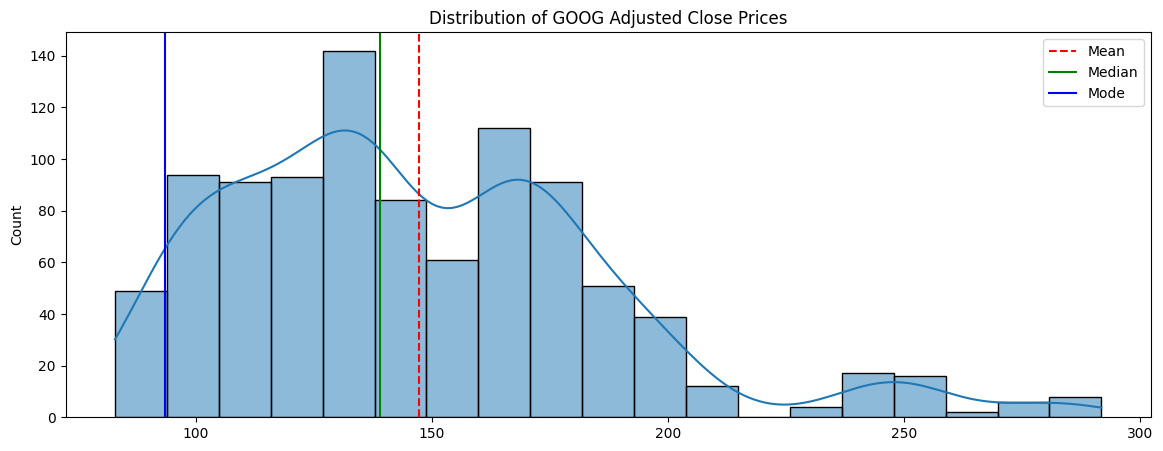

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose a ticker
ticker = "GOOG"

# Extract the values
v_dist_1 = stocksdata[ticker].dropna().values

# Create plot
f, ax1 = plt.subplots(1, 1, figsize=(14, 5))
sns.histplot(v_dist_1, ax=ax1, kde=True)

# Summary statistics
mean = stocksdata[ticker].mean()
median = stocksdata[ticker].median()
mode = stocksdata[ticker].mode().values[0]

# Add lines
ax1.axvline(mean, color='r', linestyle='--', label="Mean")
ax1.axvline(median, color='g', linestyle='-', label="Median")
ax1.axvline(mode, color='b', linestyle='-', label="Mode")

ax1.set_title(f"Distribution of {ticker} Adjusted Close Prices")
ax1.legend()
plt.show()


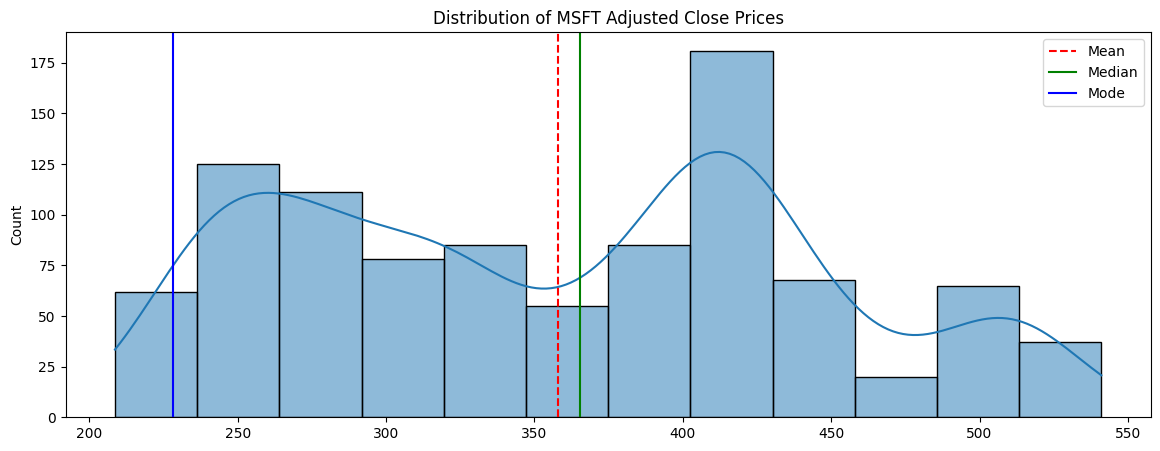

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose a ticker
ticker = "MSFT"

# Extract the values
v_dist_1 = stocksdata[ticker].dropna().values

# Create plot
f, ax1 = plt.subplots(1, 1, figsize=(14, 5))
sns.histplot(v_dist_1, ax=ax1, kde=True)

# Summary statistics
mean = stocksdata[ticker].mean()
median = stocksdata[ticker].median()
mode = stocksdata[ticker].mode().values[0]

# Add lines
ax1.axvline(mean, color='r', linestyle='--', label="Mean")
ax1.axvline(median, color='g', linestyle='-', label="Median")
ax1.axvline(mode, color='b', linestyle='-', label="Mode")

ax1.set_title(f"Distribution of {ticker} Adjusted Close Prices")
ax1.legend()
plt.show()

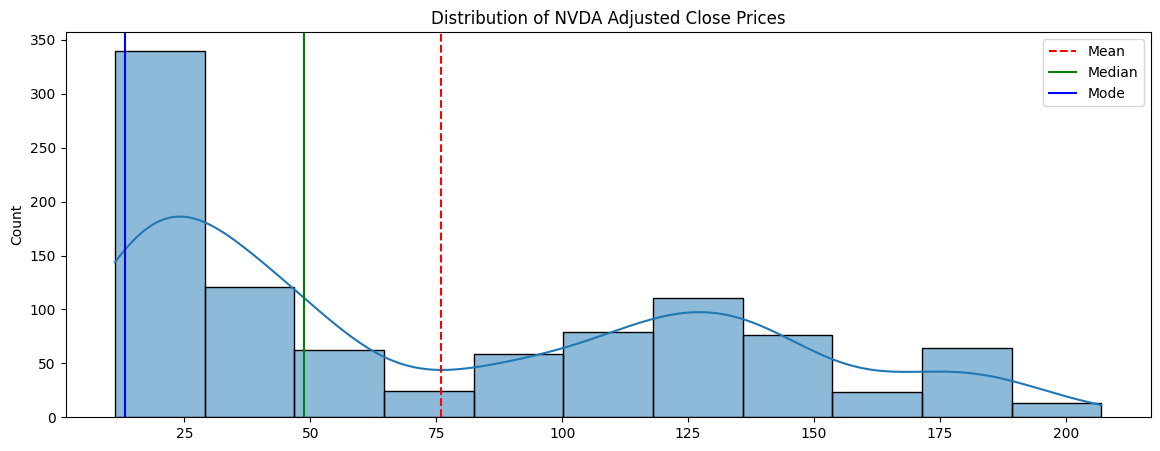

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose a ticker
ticker = "NVDA"

# Extract the values
v_dist_1 = stocksdata[ticker].dropna().values

# Create plot
f, ax1 = plt.subplots(1, 1, figsize=(14, 5))
sns.histplot(v_dist_1, ax=ax1, kde=True)

# Summary statistics
mean = stocksdata[ticker].mean()
median = stocksdata[ticker].median()
mode = stocksdata[ticker].mode().values[0]

# Add lines
ax1.axvline(mean, color='r', linestyle='--', label="Mean")
ax1.axvline(median, color='g', linestyle='-', label="Median")
ax1.axvline(mode, color='b', linestyle='-', label="Mode")

ax1.set_title(f"Distribution of {ticker} Adjusted Close Prices")
ax1.legend()
plt.show()

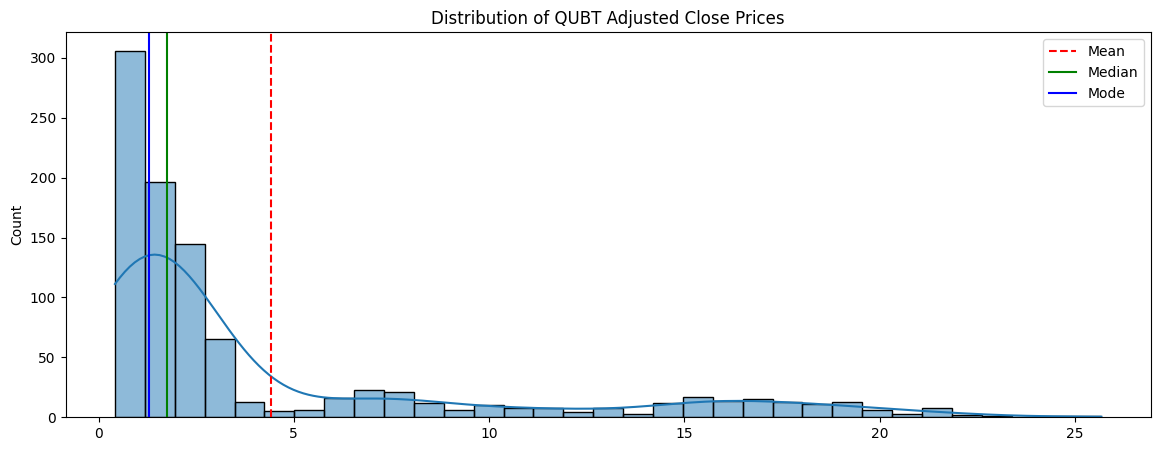

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose a ticker
ticker = "QUBT"

# Extract the values
v_dist_1 = stocksdata[ticker].dropna().values

# Create plot
f, ax1 = plt.subplots(1, 1, figsize=(14, 5))
sns.histplot(v_dist_1, ax=ax1, kde=True)

# Summary statistics
mean = stocksdata[ticker].mean()
median = stocksdata[ticker].median()
mode = stocksdata[ticker].mode().values[0]

# Add lines
ax1.axvline(mean, color='r', linestyle='--', label="Mean")
ax1.axvline(median, color='g', linestyle='-', label="Median")
ax1.axvline(mode, color='b', linestyle='-', label="Mode")

ax1.set_title(f"Distribution of {ticker} Adjusted Close Prices")
ax1.legend()
plt.show()

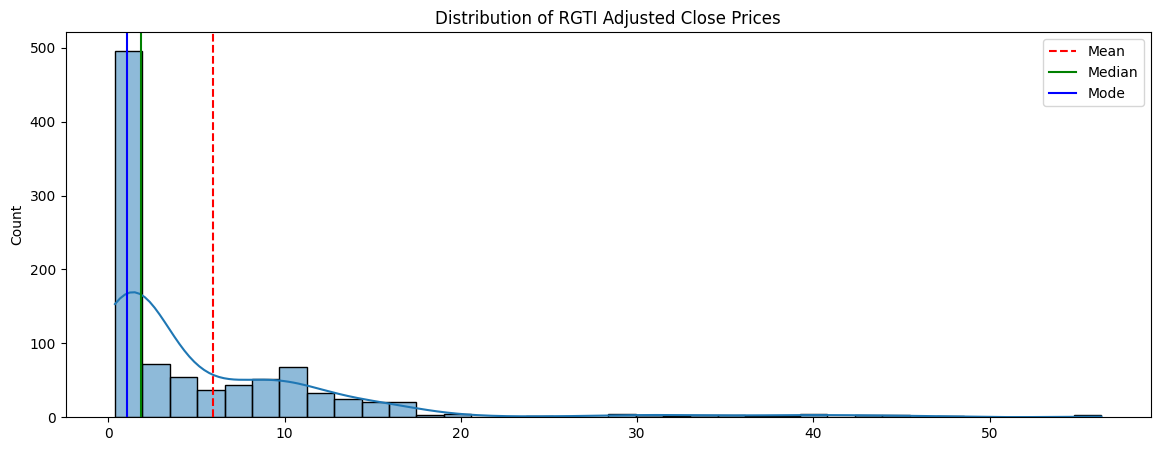

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose a ticker
ticker = "RGTI"

# Extract the values
v_dist_1 = stocksdata[ticker].dropna().values

# Create plot
f, ax1 = plt.subplots(1, 1, figsize=(14, 5))
sns.histplot(v_dist_1, ax=ax1, kde=True)

# Summary statistics
mean = stocksdata[ticker].mean()
median = stocksdata[ticker].median()
mode = stocksdata[ticker].mode().values[0]

# Add lines
ax1.axvline(mean, color='r', linestyle='--', label="Mean")
ax1.axvline(median, color='g', linestyle='-', label="Median")
ax1.axvline(mode, color='b', linestyle='-', label="Mode")

ax1.set_title(f"Distribution of {ticker} Adjusted Close Prices")
ax1.legend()
plt.show()

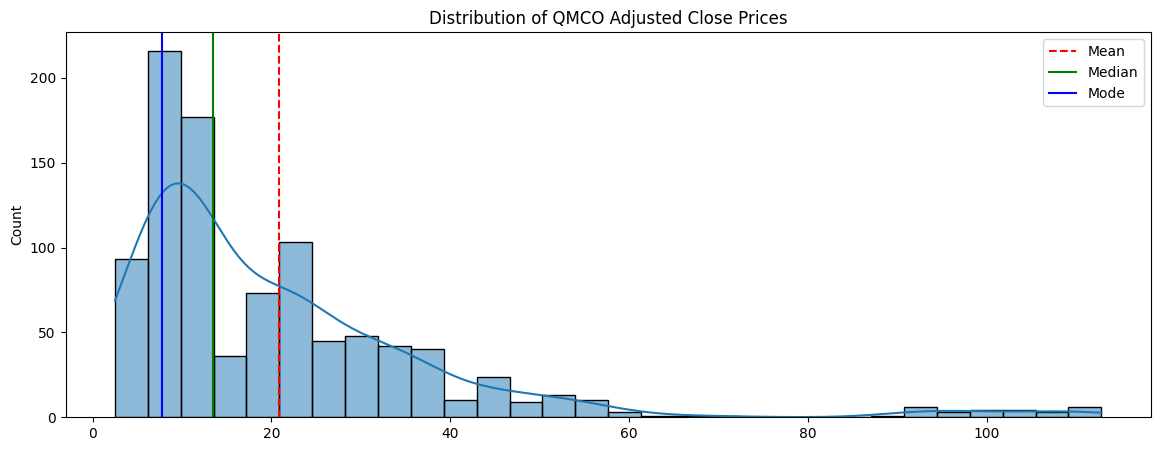

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose a ticker
ticker = "QMCO"

# Extract the values
v_dist_1 = stocksdata[ticker].dropna().values

# Create plot
f, ax1 = plt.subplots(1, 1, figsize=(14, 5))
sns.histplot(v_dist_1, ax=ax1, kde=True)

# Summary statistics
mean = stocksdata[ticker].mean()
median = stocksdata[ticker].median()
mode = stocksdata[ticker].mode().values[0]

# Add lines
ax1.axvline(mean, color='r', linestyle='--', label="Mean")
ax1.axvline(median, color='g', linestyle='-', label="Median")
ax1.axvline(mode, color='b', linestyle='-', label="Mode")

ax1.set_title(f"Distribution of {ticker} Adjusted Close Prices")
ax1.legend()
plt.show()

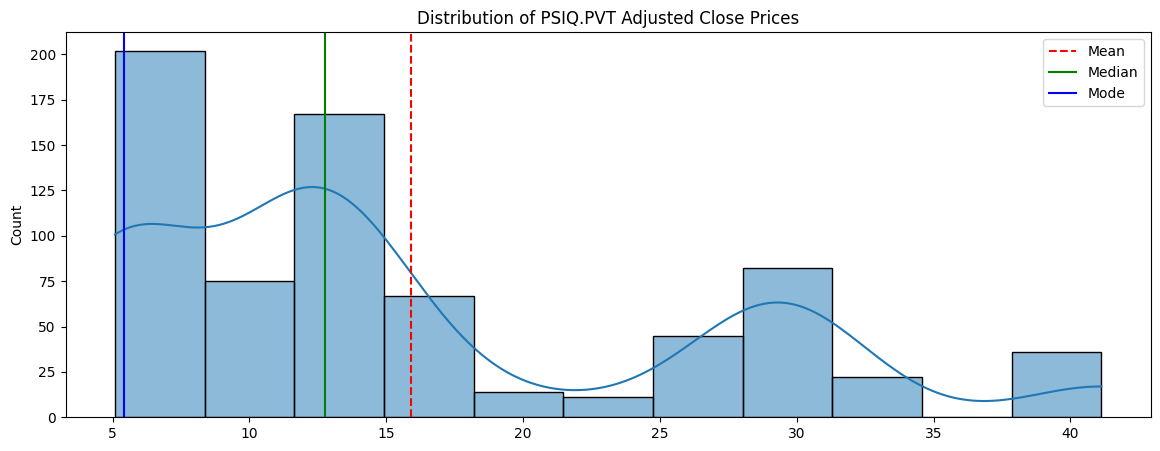

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose a ticker
ticker = "PSIQ.PVT"

# Extract the values
v_dist_1 = stocksdata[ticker].dropna().values

# Create plot
f, ax1 = plt.subplots(1, 1, figsize=(14, 5))
sns.histplot(v_dist_1, ax=ax1, kde=True)

# Summary statistics
mean = stocksdata[ticker].mean()
median = stocksdata[ticker].median()
mode = stocksdata[ticker].mode().values[0]

# Add lines
ax1.axvline(mean, color='r', linestyle='--', label="Mean")
ax1.axvline(median, color='g', linestyle='-', label="Median")
ax1.axvline(mode, color='b', linestyle='-', label="Mode")

ax1.set_title(f"Distribution of {ticker} Adjusted Close Prices")
ax1.legend()
plt.show()

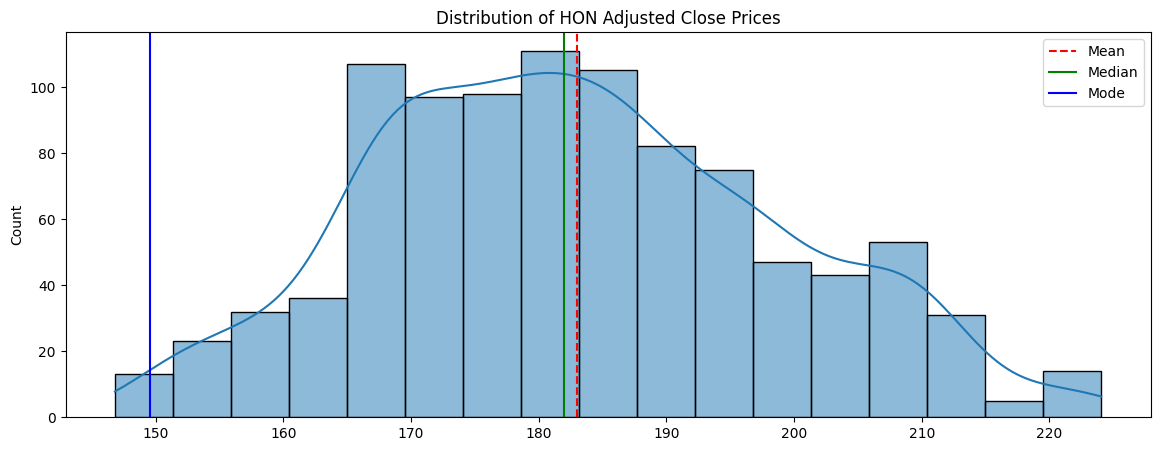

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose a ticker
ticker = "HON"

# Extract the values
v_dist_1 = stocksdata[ticker].dropna().values

# Create plot
f, ax1 = plt.subplots(1, 1, figsize=(14, 5))
sns.histplot(v_dist_1, ax=ax1, kde=True)

# Summary statistics
mean = stocksdata[ticker].mean()
median = stocksdata[ticker].median()
mode = stocksdata[ticker].mode().values[0]

# Add lines
ax1.axvline(mean, color='r', linestyle='--', label="Mean")
ax1.axvline(median, color='g', linestyle='-', label="Median")
ax1.axvline(mode, color='b', linestyle='-', label="Mode")

ax1.set_title(f"Distribution of {ticker} Adjusted Close Prices")
ax1.legend()
plt.show()

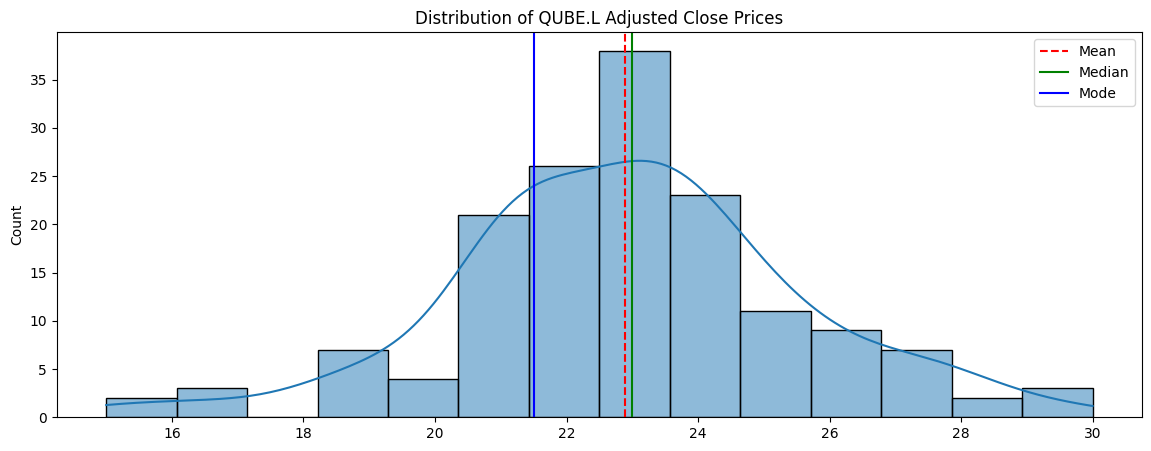

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose a ticker
ticker = "QUBE.L"

# Extract the values
v_dist_1 = stocksdata[ticker].dropna().values

# Create plot
f, ax1 = plt.subplots(1, 1, figsize=(14, 5))
sns.histplot(v_dist_1, ax=ax1, kde=True)

# Summary statistics
mean = stocksdata[ticker].mean()
median = stocksdata[ticker].median()
mode = stocksdata[ticker].mode().values[0]

# Add lines
ax1.axvline(mean, color='r', linestyle='--', label="Mean")
ax1.axvline(median, color='g', linestyle='-', label="Median")
ax1.axvline(mode, color='b', linestyle='-', label="Mode")

ax1.set_title(f"Distribution of {ticker} Adjusted Close Prices")
ax1.legend()
plt.show()

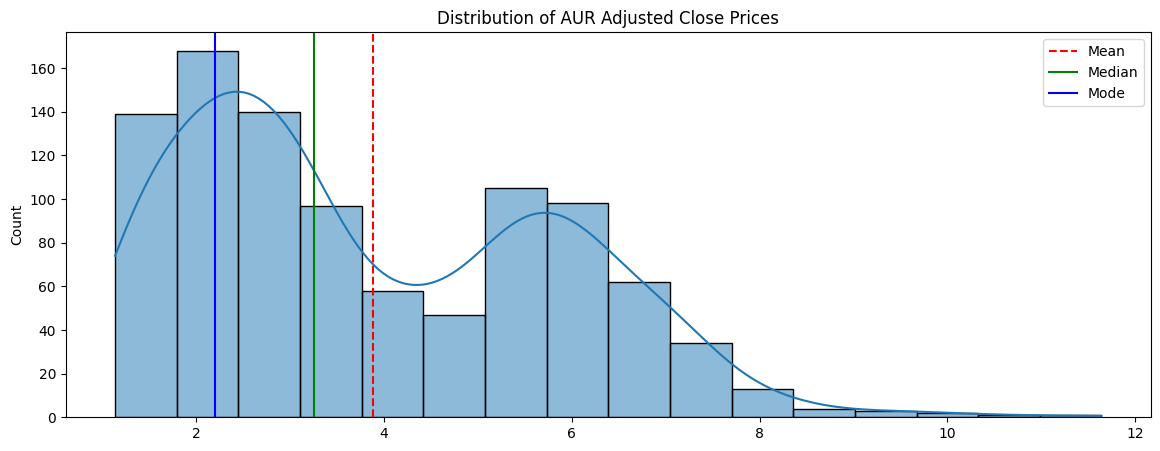

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose a ticker
ticker = "AUR"

# Extract the values
v_dist_1 = stocksdata[ticker].dropna().values

# Create plot
f, ax1 = plt.subplots(1, 1, figsize=(14, 5))
sns.histplot(v_dist_1, ax=ax1, kde=True)

# Summary statistics
mean = stocksdata[ticker].mean()
median = stocksdata[ticker].median()
mode = stocksdata[ticker].mode().values[0]

# Add lines
ax1.axvline(mean, color='r', linestyle='--', label="Mean")
ax1.axvline(median, color='g', linestyle='-', label="Median")
ax1.axvline(mode, color='b', linestyle='-', label="Mode")

ax1.set_title(f"Distribution of {ticker} Adjusted Close Prices")
ax1.legend()
plt.show()

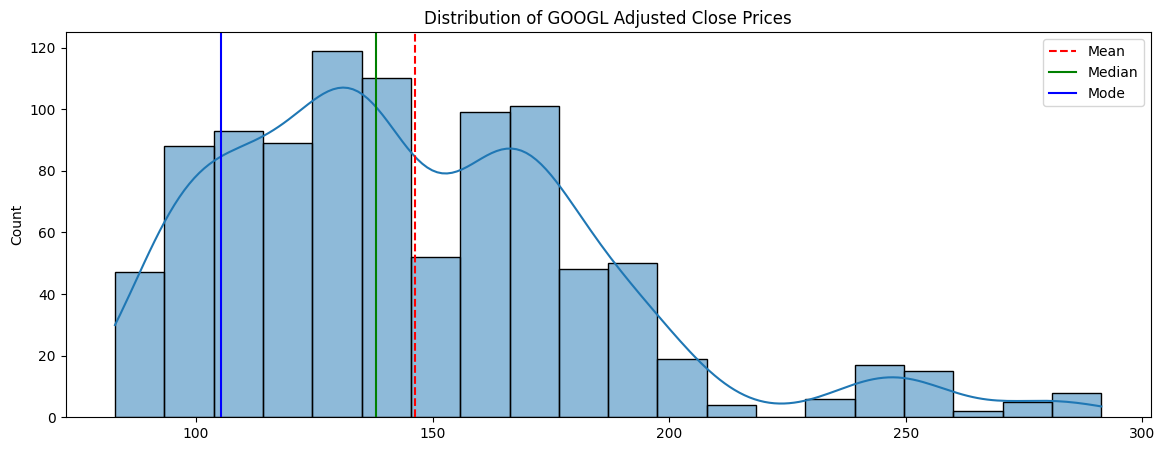

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose a ticker
ticker = "GOOGL"

# Extract the values
v_dist_1 = stocksdata[ticker].dropna().values

# Create plot
f, ax1 = plt.subplots(1, 1, figsize=(14, 5))
sns.histplot(v_dist_1, ax=ax1, kde=True)

# Summary statistics
mean = stocksdata[ticker].mean()
median = stocksdata[ticker].median()
mode = stocksdata[ticker].mode().values[0]

# Add lines
ax1.axvline(mean, color='r', linestyle='--', label="Mean")
ax1.axvline(median, color='g', linestyle='-', label="Median")
ax1.axvline(mode, color='b', linestyle='-', label="Mode")

ax1.set_title(f"Distribution of {ticker} Adjusted Close Prices")
ax1.legend()
plt.show()

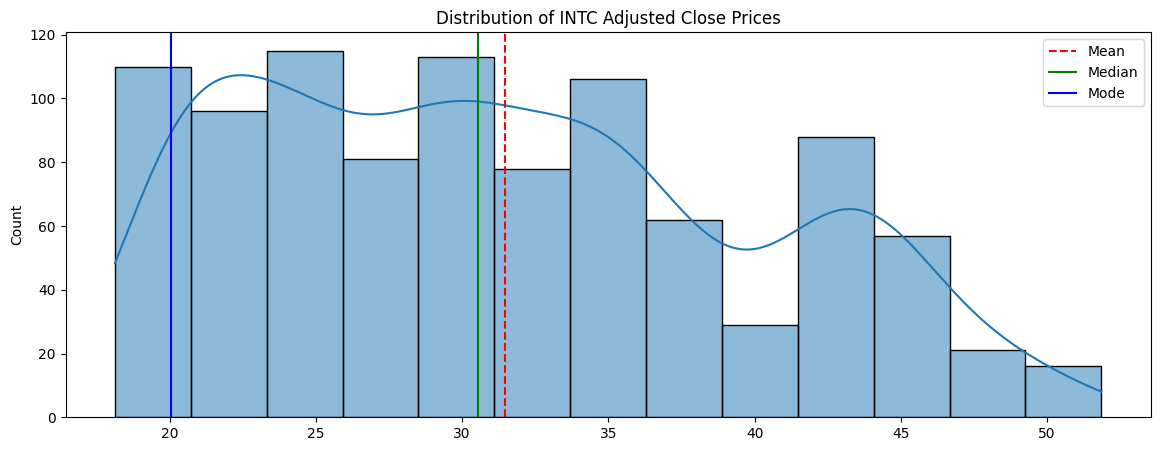

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose a ticker
ticker = "INTC"

# Extract the values
v_dist_1 = stocksdata[ticker].dropna().values

# Create plot
f, ax1 = plt.subplots(1, 1, figsize=(14, 5))
sns.histplot(v_dist_1, ax=ax1, kde=True)

# Summary statistics
mean = stocksdata[ticker].mean()
median = stocksdata[ticker].median()
mode = stocksdata[ticker].mode().values[0]

# Add lines
ax1.axvline(mean, color='r', linestyle='--', label="Mean")
ax1.axvline(median, color='g', linestyle='-', label="Median")
ax1.axvline(mode, color='b', linestyle='-', label="Mode")

ax1.set_title(f"Distribution of {ticker} Adjusted Close Prices")
ax1.legend()
plt.show()

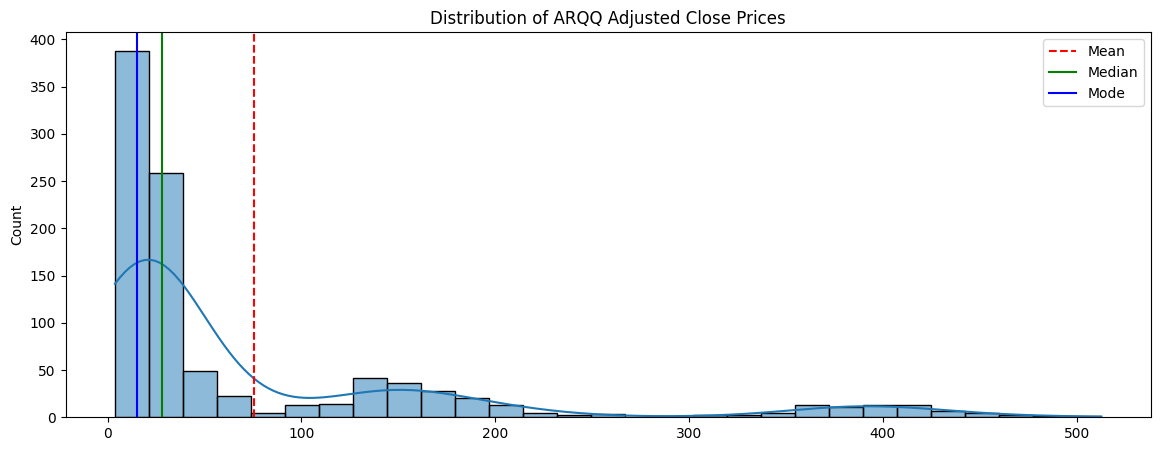

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose a ticker
ticker = "ARQQ"

# Extract the values
v_dist_1 = stocksdata[ticker].dropna().values

# Create plot
f, ax1 = plt.subplots(1, 1, figsize=(14, 5))
sns.histplot(v_dist_1, ax=ax1, kde=True)

# Summary statistics
mean = stocksdata[ticker].mean()
median = stocksdata[ticker].median()
mode = stocksdata[ticker].mode().values[0]

# Add lines
ax1.axvline(mean, color='r', linestyle='--', label="Mean")
ax1.axvline(median, color='g', linestyle='-', label="Median")
ax1.axvline(mode, color='b', linestyle='-', label="Mode")

ax1.set_title(f"Distribution of {ticker} Adjusted Close Prices")
ax1.legend()
plt.show()

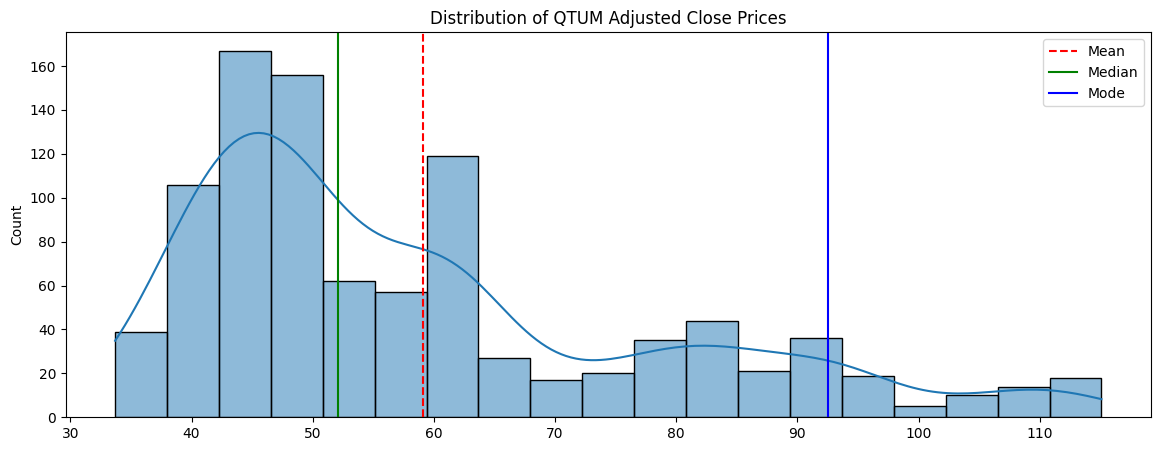

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose a ticker
ticker = "QTUM"

# Extract the values
v_dist_1 = stocksdata[ticker].dropna().values

# Create plot
f, ax1 = plt.subplots(1, 1, figsize=(14, 5))
sns.histplot(v_dist_1, ax=ax1, kde=True)

# Summary statistics
mean = stocksdata[ticker].mean()
median = stocksdata[ticker].median()
mode = stocksdata[ticker].mode().values[0]

# Add lines
ax1.axvline(mean, color='r', linestyle='--', label="Mean")
ax1.axvline(median, color='g', linestyle='-', label="Median")
ax1.axvline(mode, color='b', linestyle='-', label="Mode")

ax1.set_title(f"Distribution of {ticker} Adjusted Close Prices")
ax1.legend()
plt.show()

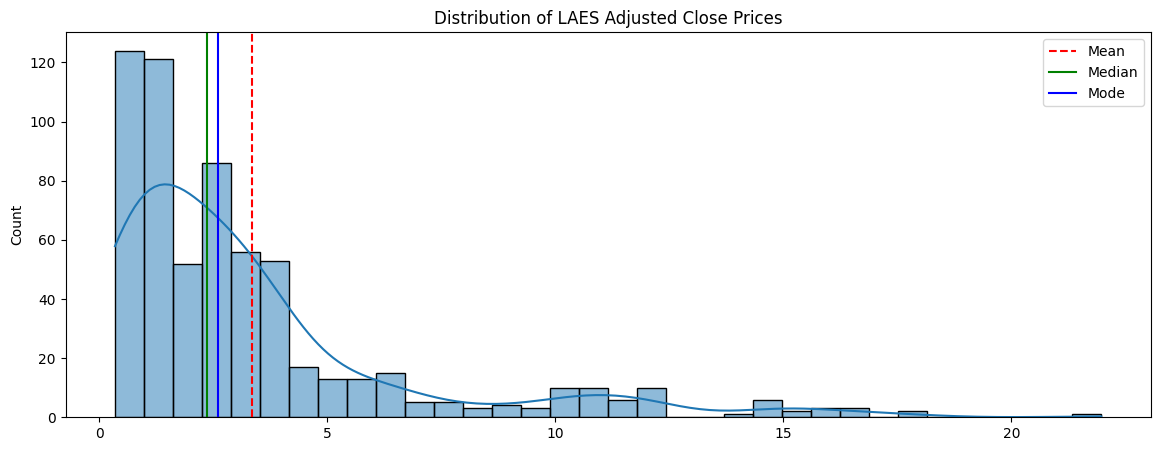

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose a ticker
ticker = "LAES"

# Extract the values
v_dist_1 = stocksdata[ticker].dropna().values

# Create plot
f, ax1 = plt.subplots(1, 1, figsize=(14, 5))
sns.histplot(v_dist_1, ax=ax1, kde=True)

# Summary statistics
mean = stocksdata[ticker].mean()
median = stocksdata[ticker].median()
mode = stocksdata[ticker].mode().values[0]

# Add lines
ax1.axvline(mean, color='r', linestyle='--', label="Mean")
ax1.axvline(median, color='g', linestyle='-', label="Median")
ax1.axvline(mode, color='b', linestyle='-', label="Mode")

ax1.set_title(f"Distribution of {ticker} Adjusted Close Prices")
ax1.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


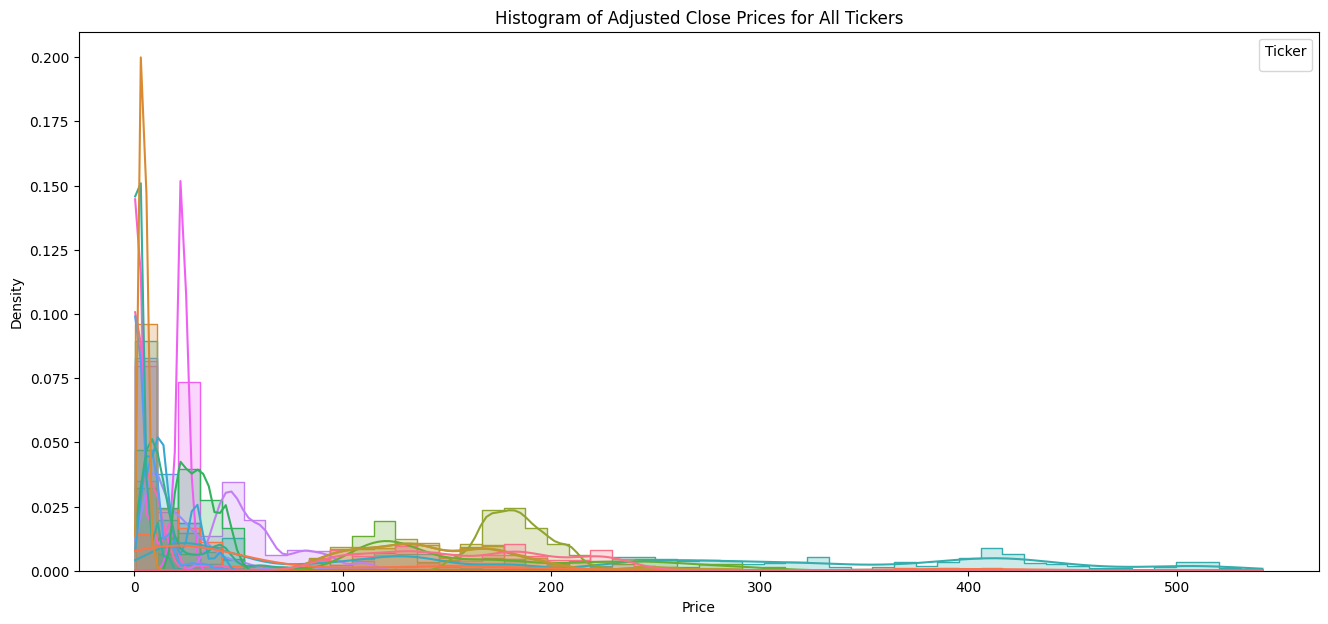

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Melt wide data to long format
df_long = stocksdata.reset_index().melt(
    id_vars="Date",
    var_name="ticker",
    value_name="adj_close"
)

# Remove missing values (AQT, QBIT, etc.)
df_long = df_long.dropna(subset=["adj_close"])

# Plot
plt.figure(figsize=(16, 7))
sns.histplot(
    df_long,
    x="adj_close",
    hue="ticker",
    kde=True,
    element="step",
    stat="density",
    common_norm=False
)

plt.title("Histogram of Adjusted Close Prices for All Tickers")
plt.xlabel("Price")
plt.ylabel("Density")
plt.legend(title="Ticker")
plt.show()


In [104]:
days_prev_len = 20

# Ensure Date is a column
stocksdata = stocksdata.reset_index()

print(stocksdata.columns)   # To confirm "Date" exists now

stocksdata_copy = stocksdata["Date"]
print(f"Before: {len(stocksdata_copy)}")

# TRAIN = everything except last 20 days
train_dates = stocksdata_copy.iloc[0 : len(stocksdata_copy) - days_prev_len]

# TEST = last 20 days
test_dates = stocksdata_copy.iloc[len(stocksdata_copy) - days_prev_len : ]

print(f"After (Train): {len(train_dates)}")
print(f"Test dt: {len(test_dates)}")

Index(['level_0', 'index', 'Date', 'AMZN', 'ARQQ', 'AUR', 'GOOG', 'GOOGL',
       'HON', 'IBM', 'INTC', 'IONQ', 'LAES', 'MSFT', 'NVDA', 'PSIQ.PVT',
       'QBTS', 'QMCO', 'QTUM', 'QUBE.L', 'QUBT', 'RGTI'],
      dtype='object', name='Ticker')
Before: 975
After (Train): 955
Test dt: 20


In [149]:
print(df_long.columns)

Index(['Date', 'ticker', 'adj_close'], dtype='object')


In [148]:
days_prev_len = 20

# Select the price column
prices = df_long["adj_close"]

print(f"Total rows: {len(df_long)}")

# Split into train and test
prices_train_copy = prices.iloc[:-days_prev_len]
prices_test_copy  = prices.iloc[-days_prev_len:]

print(f"Train rows: {len(prices_train_copy)}")
print(f"Test rows:  {len(prices_test_copy)}")


Total rows: 17053
Train rows: 17033
Test rows:  20


In [150]:
prices_train_copy = np.log(1 + prices_train_copy.pct_change())
prices_train_copy.fillna(0, inplace=True)
prices_train_copy

0        0.000000
1       -0.017060
2       -0.019074
3       -0.006734
4       -0.004297
           ...   
18500    0.223326
18501    0.021797
18502    0.003913
18503   -0.160829
18504   -0.033707
Name: adj_close, Length: 17033, dtype: float64

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def monte_carlo_simulation(price_series, num_simulations=100, forecast_days=20):
    """
    Run a Monte Carlo simulation on a price series.
    
    Parameters:
        price_series (pd.Series): historical stock prices
        num_simulations (int): number of Monte Carlo paths
        forecast_days (int): number of days to forecast
    
    Returns:
        np.ndarray: simulated price paths (num_simulations x forecast_days)
    """

    # Compute daily log returns
    log_returns = np.log(1 + price_series.pct_change().dropna())

    # Calculate statistics
    drift = log_returns.mean()
    volatility = log_returns.std()

    # Last known price
    last_price = price_series.iloc[-1]

    # Simulate paths
    results = np.zeros((num_simulations, forecast_days))

    for sim in range(num_simulations):
        prices = [last_price]
        for day in range(forecast_days):
            shock = np.random.normal(loc=drift, scale=volatility)
            new_price = prices[-1] * np.exp(shock)
            prices.append(new_price)

        # Save (skip the initial starting price)
        results[sim] = prices[1:]

    return results


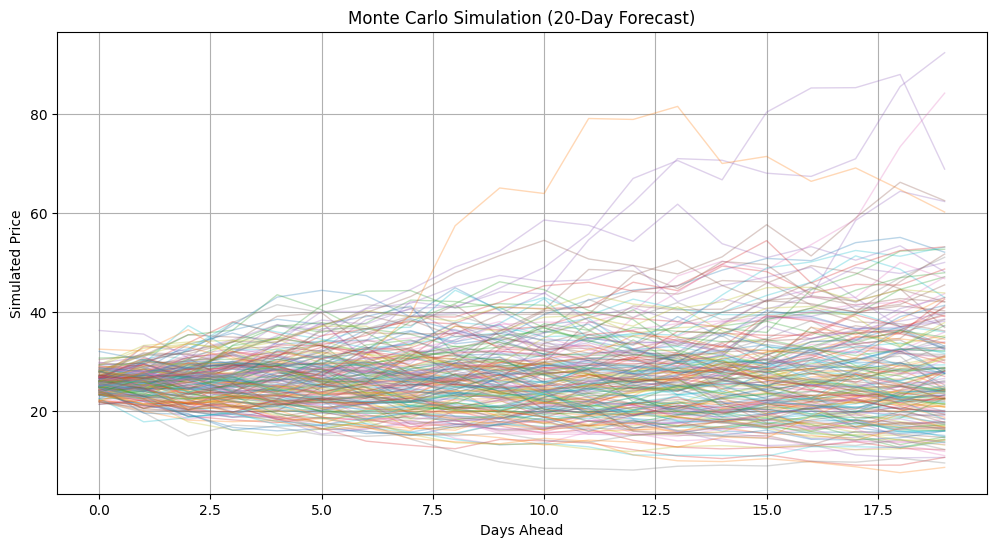

In [163]:
#Monte Carlo Simulation
# Use your df_long price column

prices = df_long["adj_close"]

# Run Monte Carlo
sim_paths = monte_carlo_simulation(prices, num_simulations=200, forecast_days=20)

# Plotting
plt.figure(figsize=(12,6))
for i in range(sim_paths.shape[0]):
    plt.plot(sim_paths[i], linewidth=1, alpha=0.3)

plt.title("Monte Carlo Simulation (20-Day Forecast)")
plt.xlabel("Days Ahead")
plt.ylabel("Simulated Price")
plt.grid(True)
plt.show()


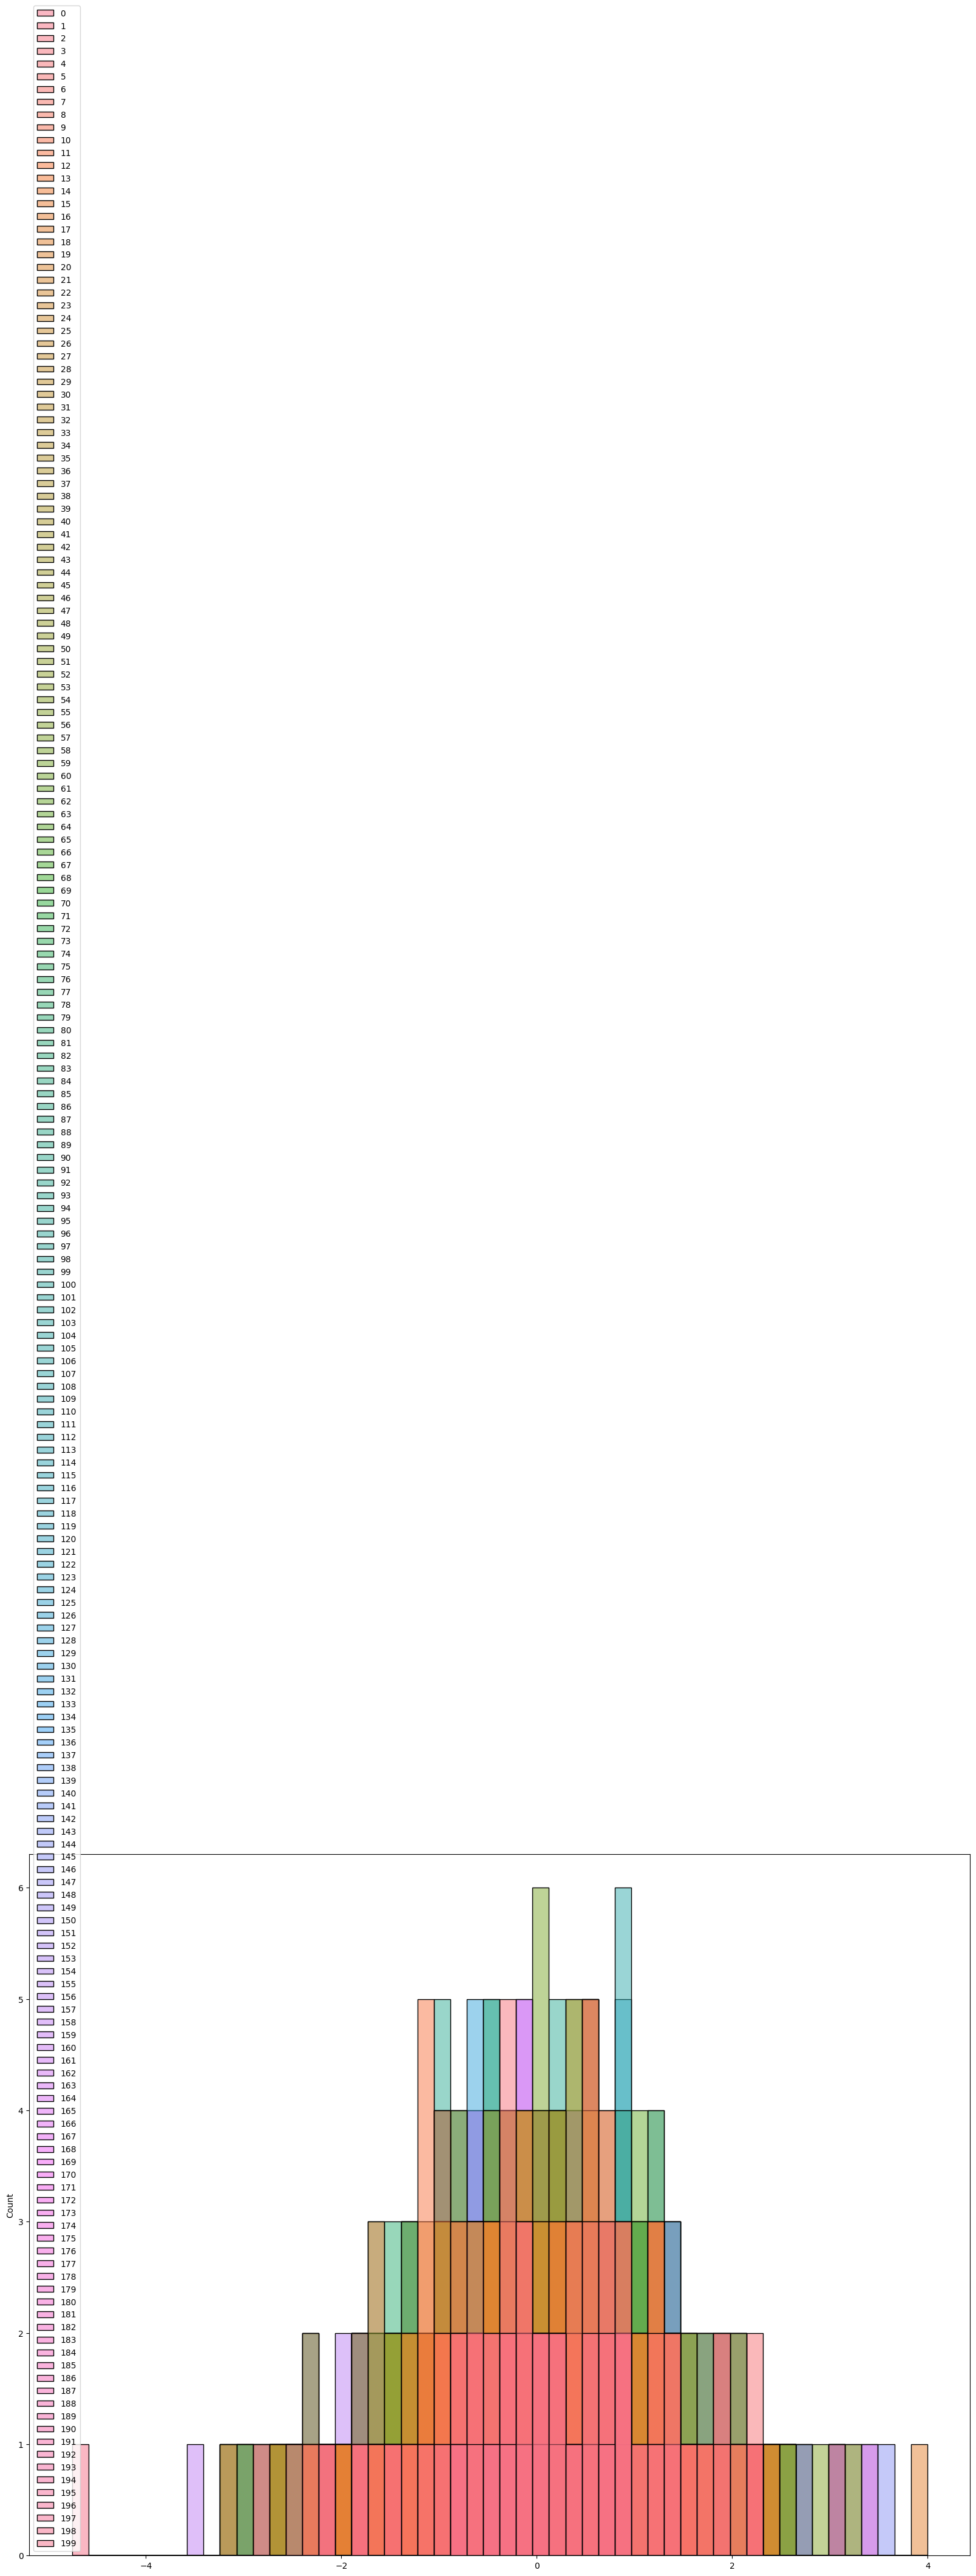

In [164]:
#Monte Carlo Simulation

simulations = 200
Z = stats.norm.ppf(np.random.rand(days_prev_len, simulations))

plt.figure(figsize=(20, 15))
sns.histplot(Z)
plt.show()

Works Cited:

Article about CAPM:
https://www.investopedia.com/terms/c/capm.asp

Article about Monte Carlo Simulation:
https://www.investopedia.com/terms/m/montecarlosimulation.asp